<font color = green >

# Matplotlib
</font>

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
# Note:  Using pylab is now discouraged

***
<font color = green >

## Setup backend
</font>


A backend is an abstraction layer which knows how to interact with the operating environment, whether it's an operating system, or an environment like the browser, and knows how to render matplotlib commands
<br>

*Note: some backends don't support some features particularly interaction features*

In [3]:
import matplotlib as mpl
mpl.get_backend() 
# Output: 'module://ipykernel.pylab.backend_inline'

'module://ipykernel.pylab.backend_inline'

Setup matplotlib backend
`%matplotlib notebook`


In [4]:
%matplotlib notebook
# %matplotlib inline
mpl.get_backend() 
# Output : 'nbAgg'

'nbAgg'

<font color = green >

### working on mac os
</font>

In case of error on Mac:
<br>`RuntimeError: Python is not installed as a framework. The Mac OS X backend will not be able to function correctly if Python is not installed as a framework.`
<br>Use:
<br>`import matplotlib`
<br>`matplotlib.use('TkAgg')`
<br>
`print (matplotlib.get_backend())`
<br>
`# out: TkAgg`

also include `plt.show()` after plot configuration

***
<font color = green >

## Matplotlib layers 
</font>

* `backend layer` deals with actual drawing 
* `artist layer` on top of the backend  describes how data is arranged (aka `matplotlib api`)
* `scripting layer` - actually creates artists and choreographs them all togethe

***
<font color = green >

## plot 
</font>

<IPython.core.display.Javascript object>


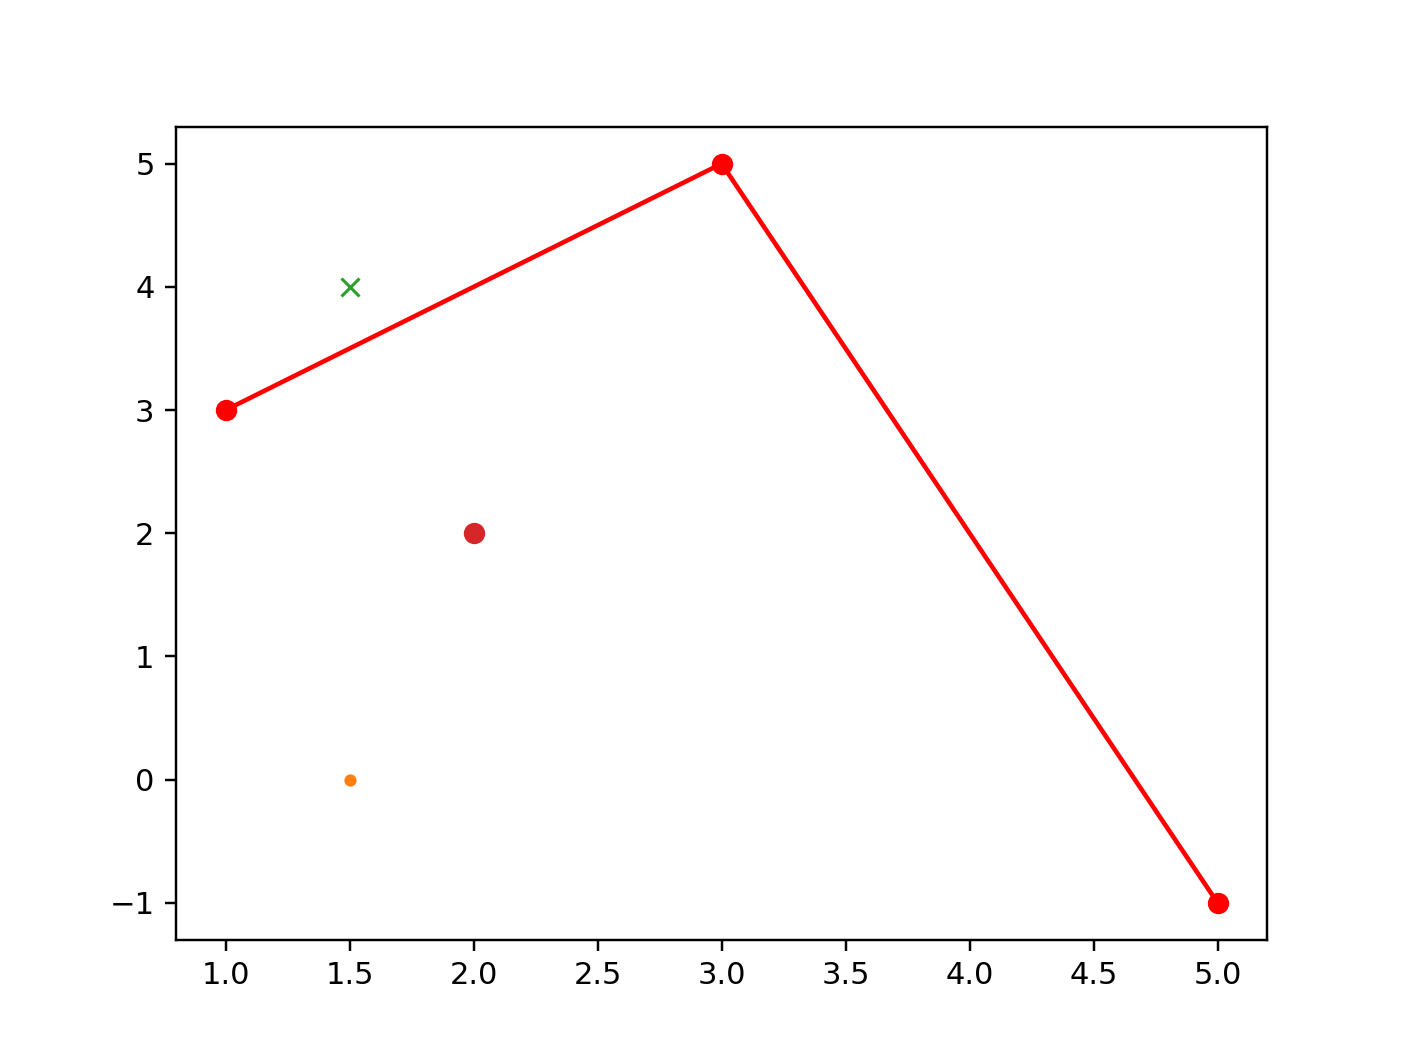

In [9]:
plt.figure()
plt.plot(1,3) # no mark 
plt.plot(1.5,0, '.') # small point 
plt.plot(1.5,4,'x') # x mark 
plt.plot(2,2,'o')
plt.plot([1,3,5],[3,5,-1],'-o', c= 'red') # joined
# Note 
    # different colors since it considers as different series 
    # This is scripting layer 


<IPython.core.display.Javascript object>


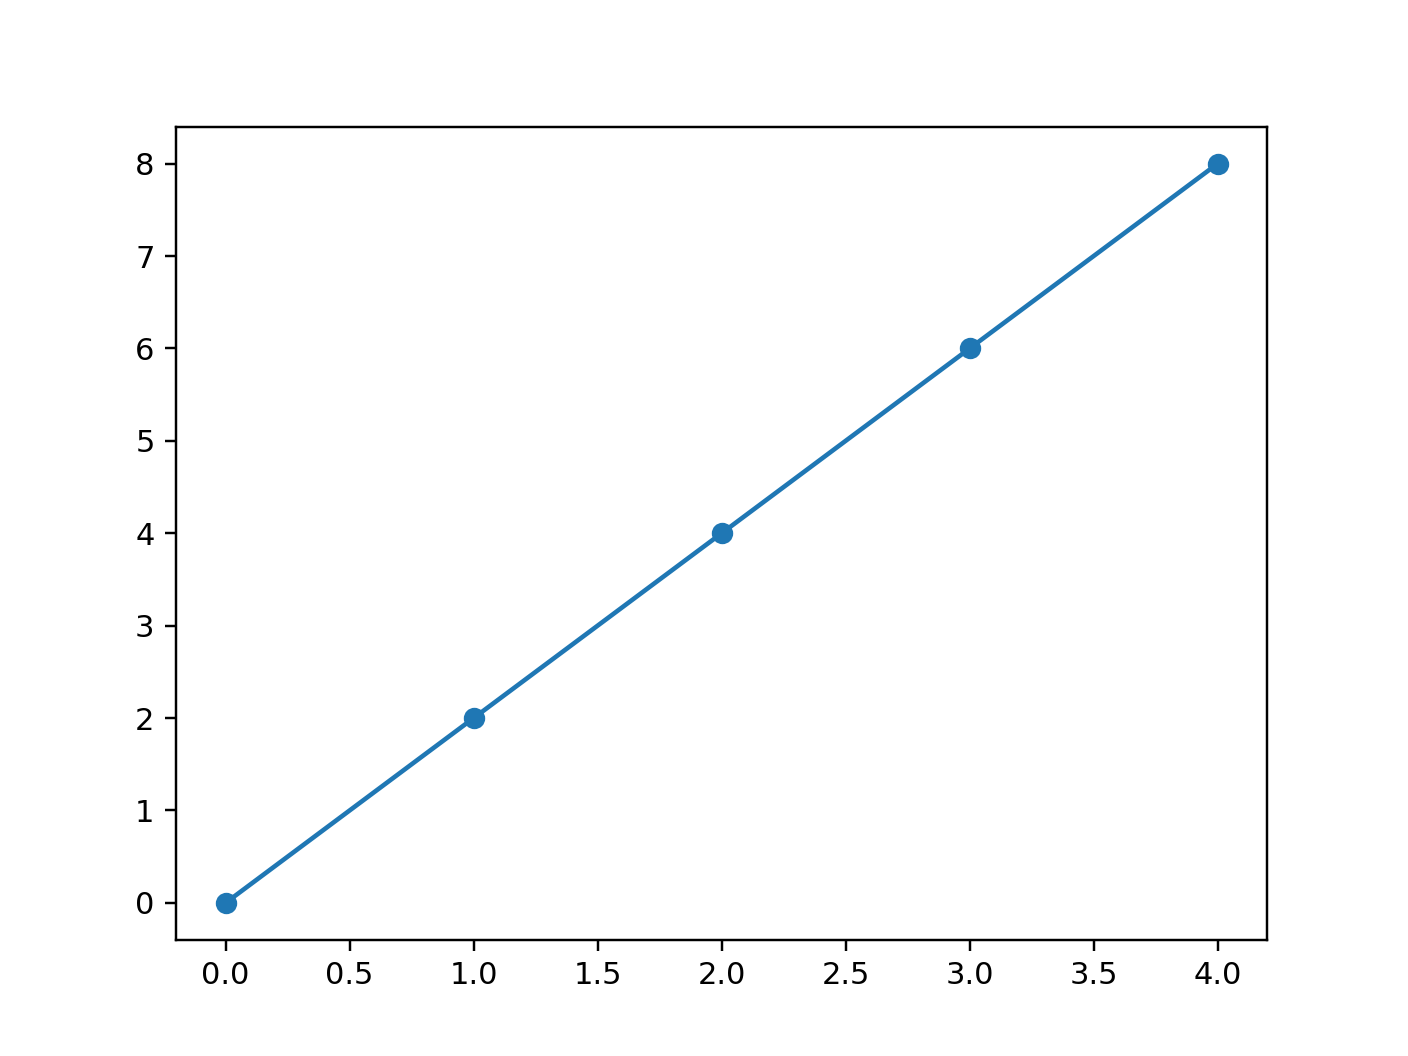

In [10]:
import numpy as np 
plt.figure()
y= np.arange(0,10,2)
plt.plot(y,'o-')
# Note x-vals resolved automatically 

#### Line styles

<IPython.core.display.Javascript object>


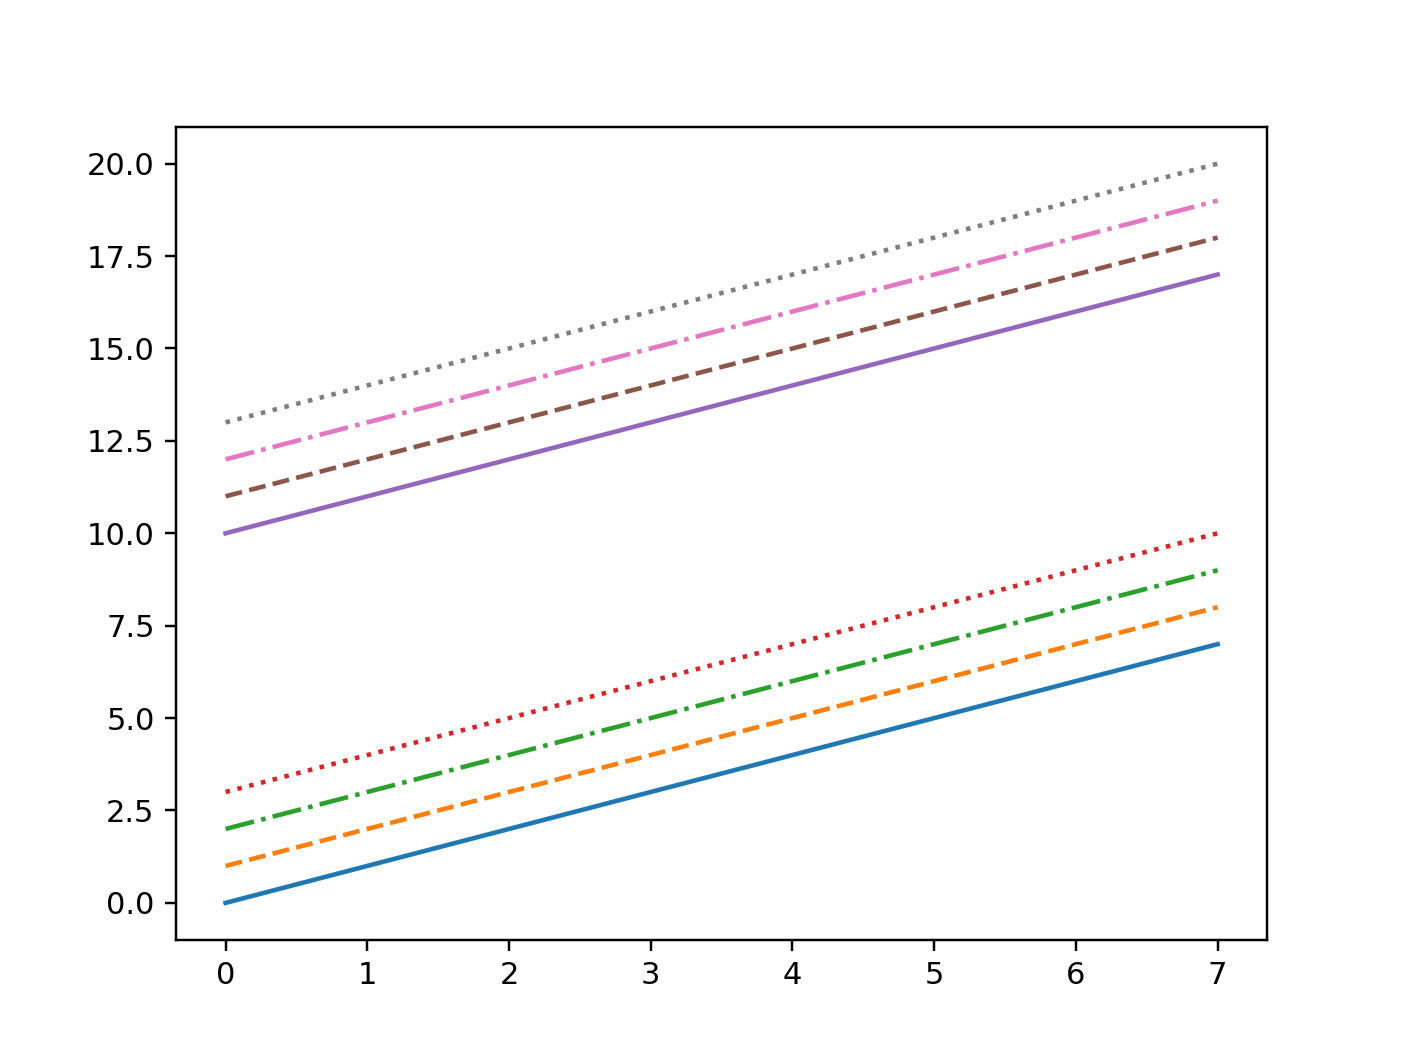

In [12]:
plt.figure()
x = np.linspace(0,7,100)
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

# For short, you can use the following codes: 
plt.plot(x, x + 10, linestyle='-') # solid 
plt.plot(x, x + 11, linestyle='--') # dashed 
plt.plot(x, x + 12, linestyle='-.') # dashdot 
plt.plot(x, x + 13, linestyle=':') # dotted

#### Setting style and color 

<IPython.core.display.Javascript object>


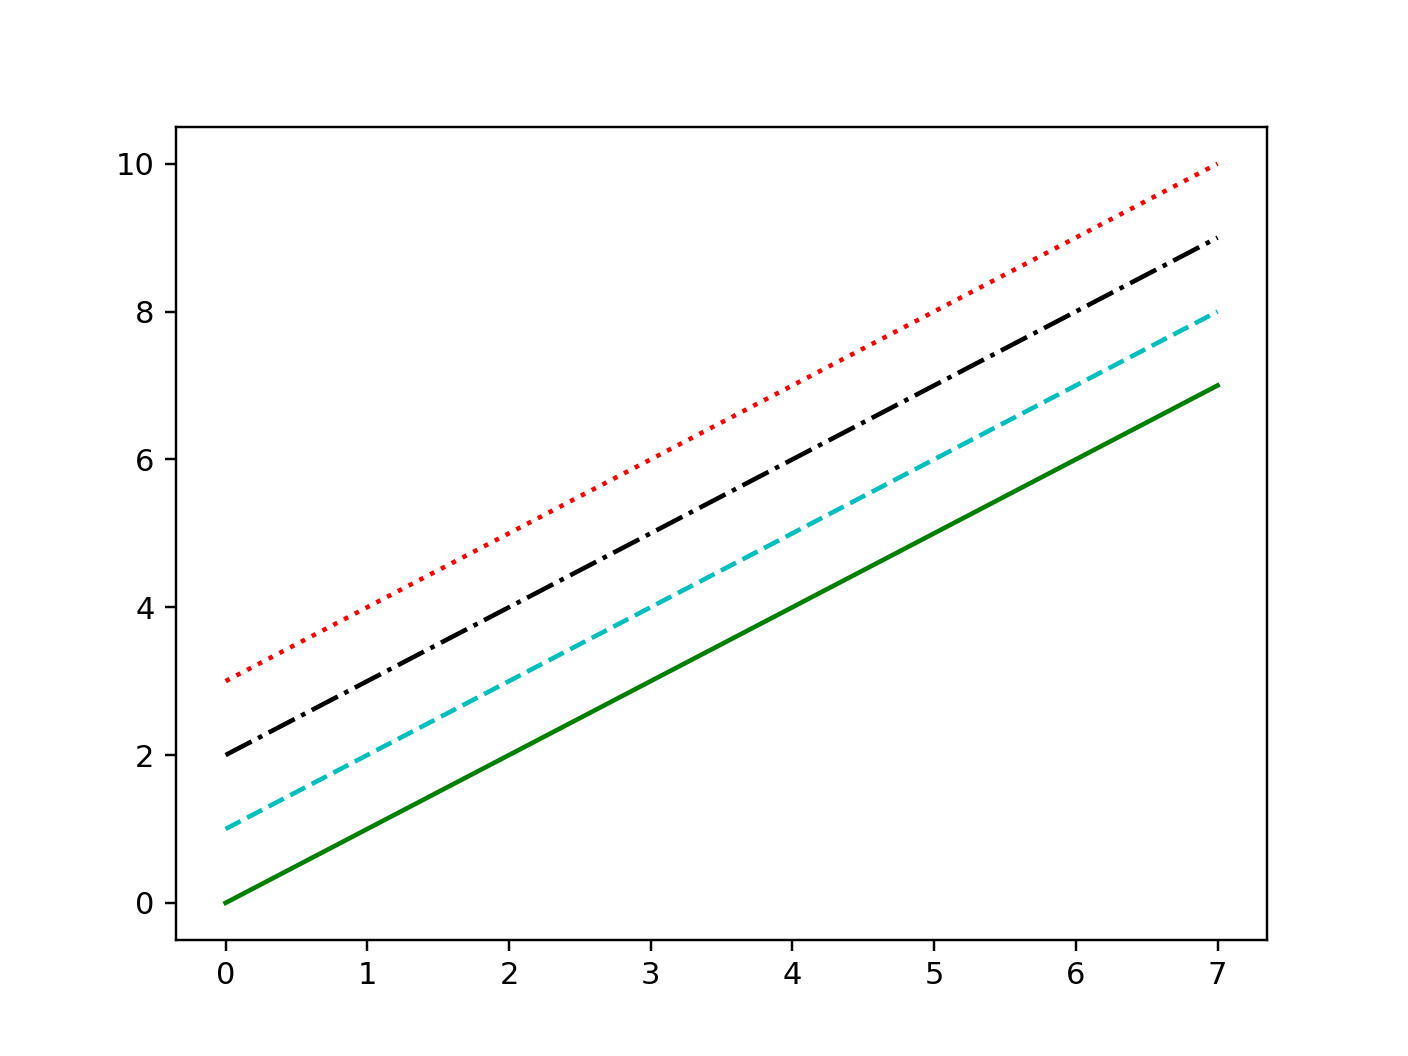

In [13]:
plt.figure()
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red

### Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but some‐ times it’s nice to have finer control. The most basic way to adjust axis limits is to use the plt.xlim() and plt.ylim() methods

<IPython.core.display.Javascript object>


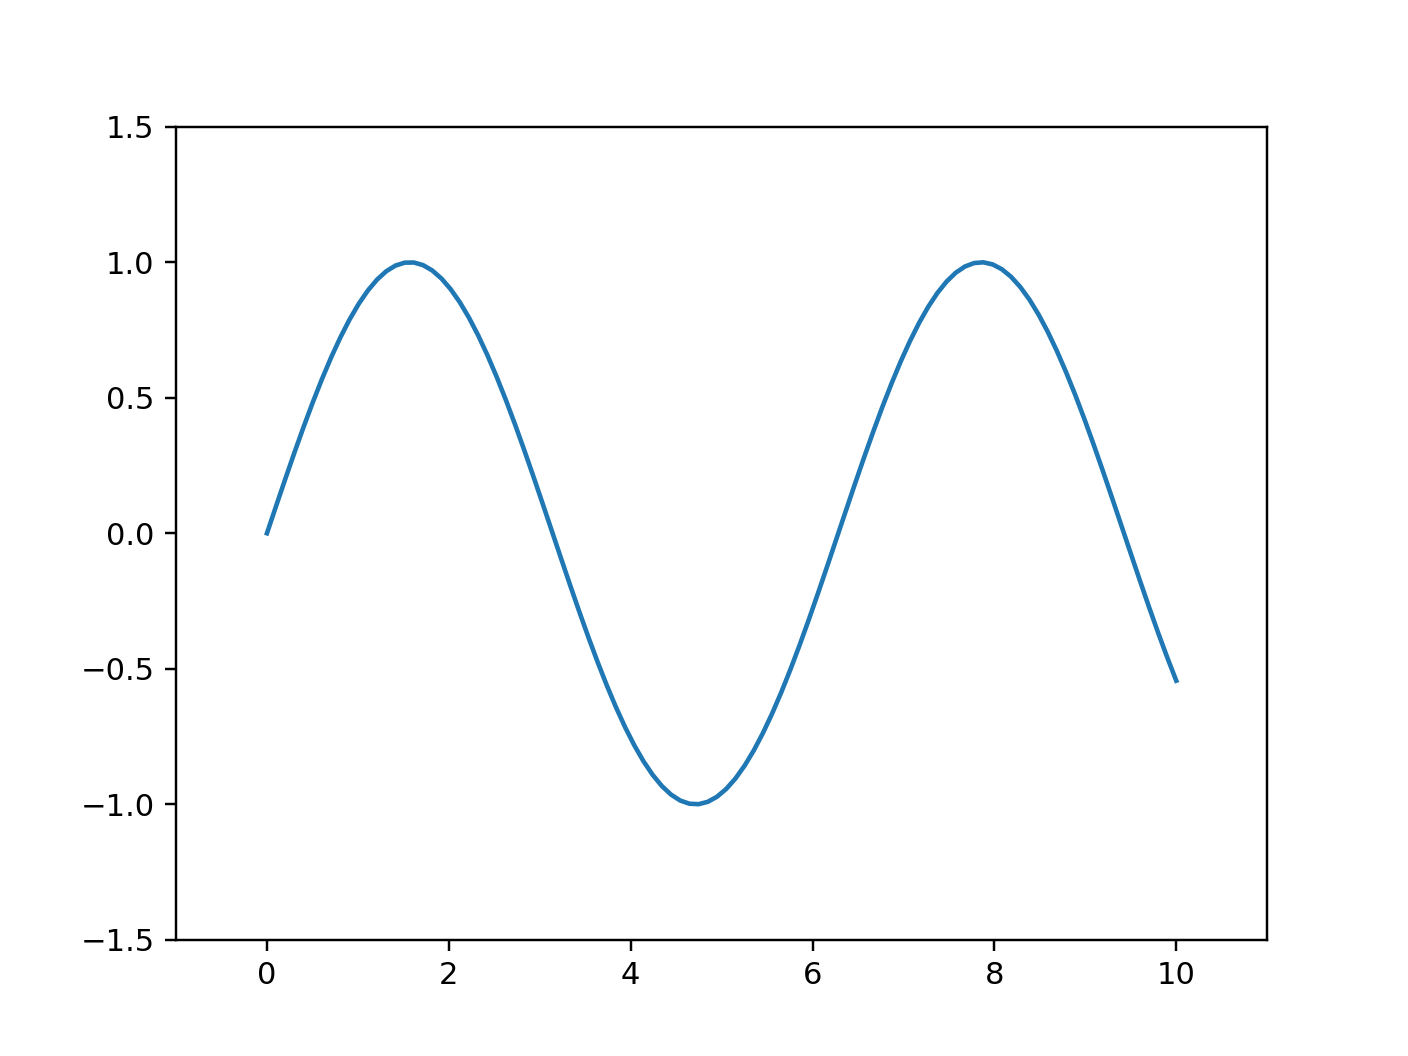

In [14]:
plt.figure()
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you’d like either axis to be displayed in reverse, you can simply reverse the order of the arguments

<IPython.core.display.Javascript object>


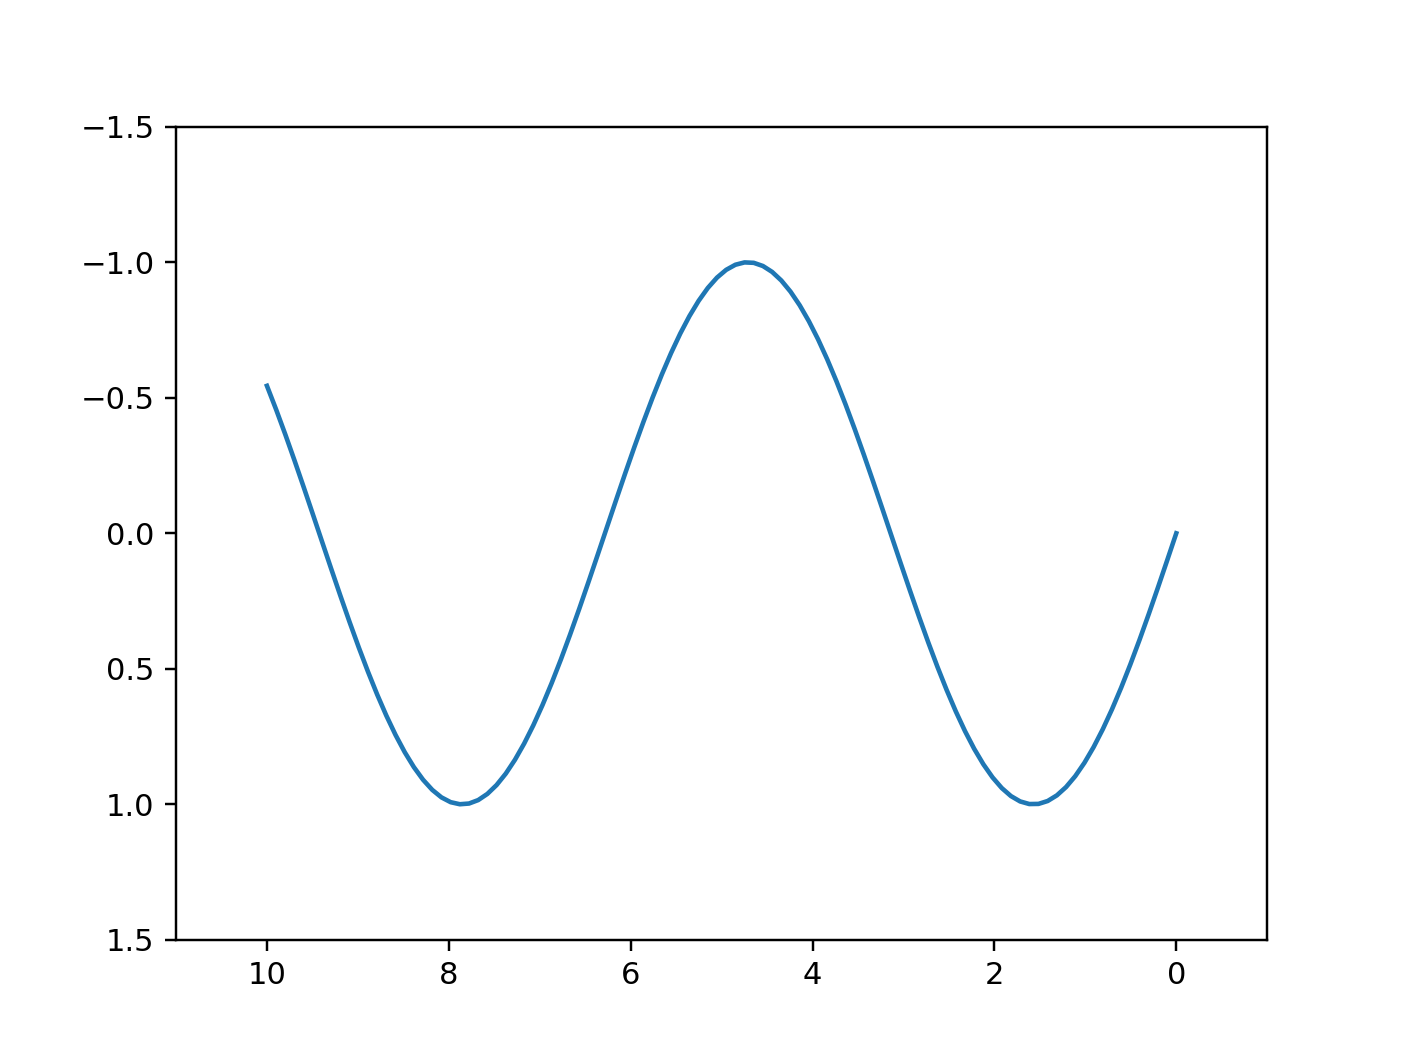

In [15]:
plt.figure()
plt.plot(x, np.sin(x))
plt.xlim(11, -1)
plt.ylim(1.5, -1.5);

### Labeling Plots

<IPython.core.display.Javascript object>


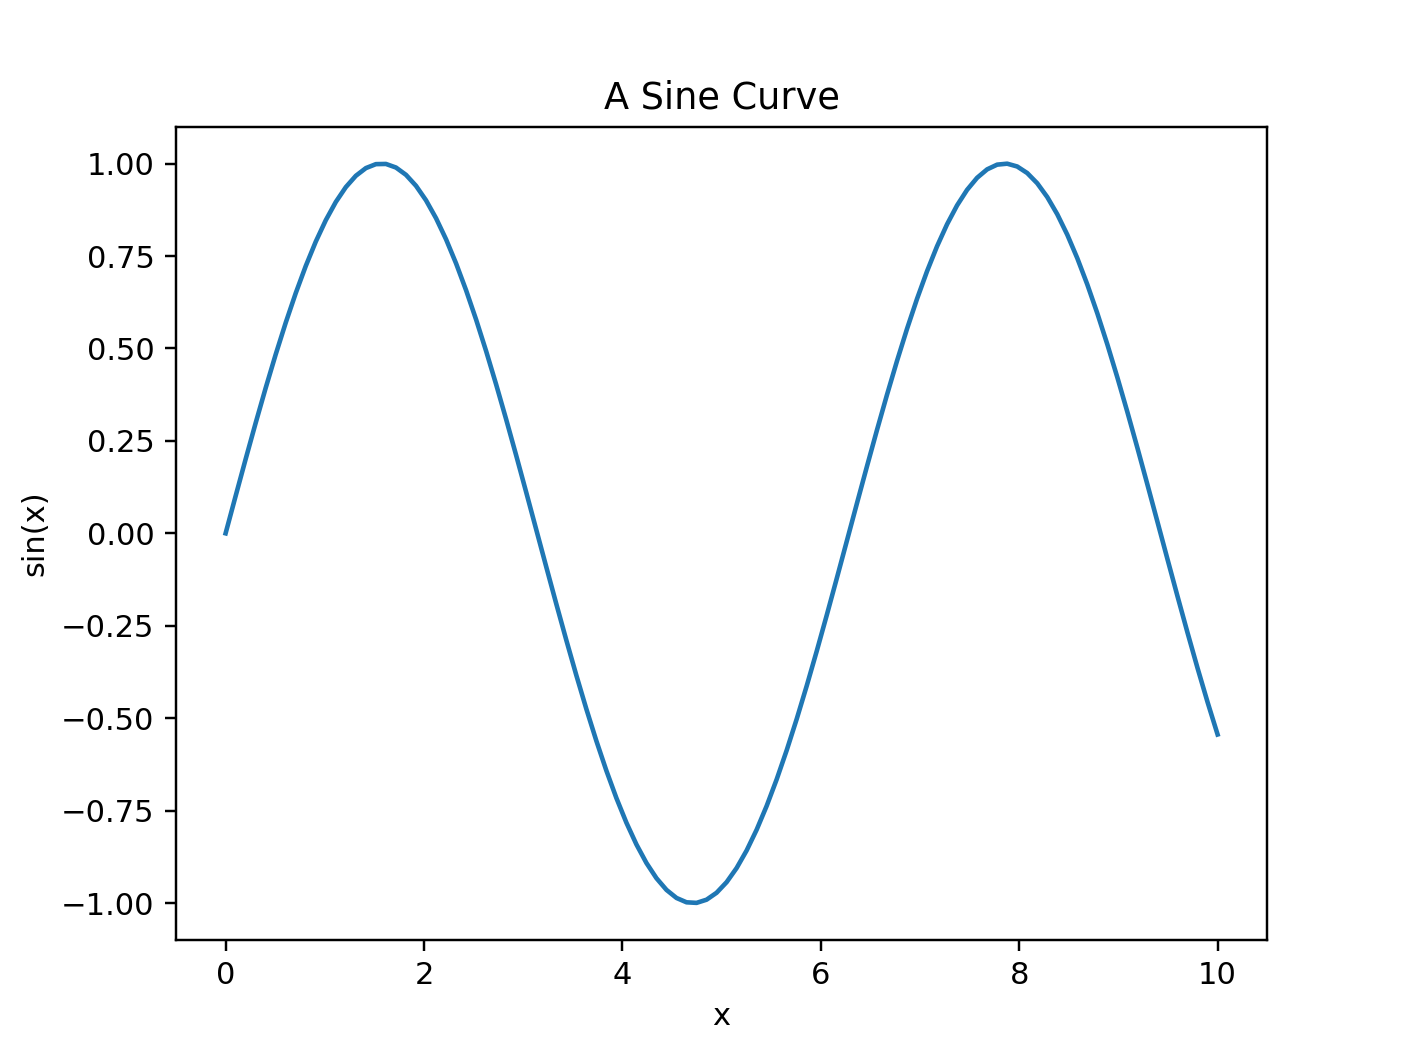

In [16]:
plt.figure()
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

<IPython.core.display.Javascript object>


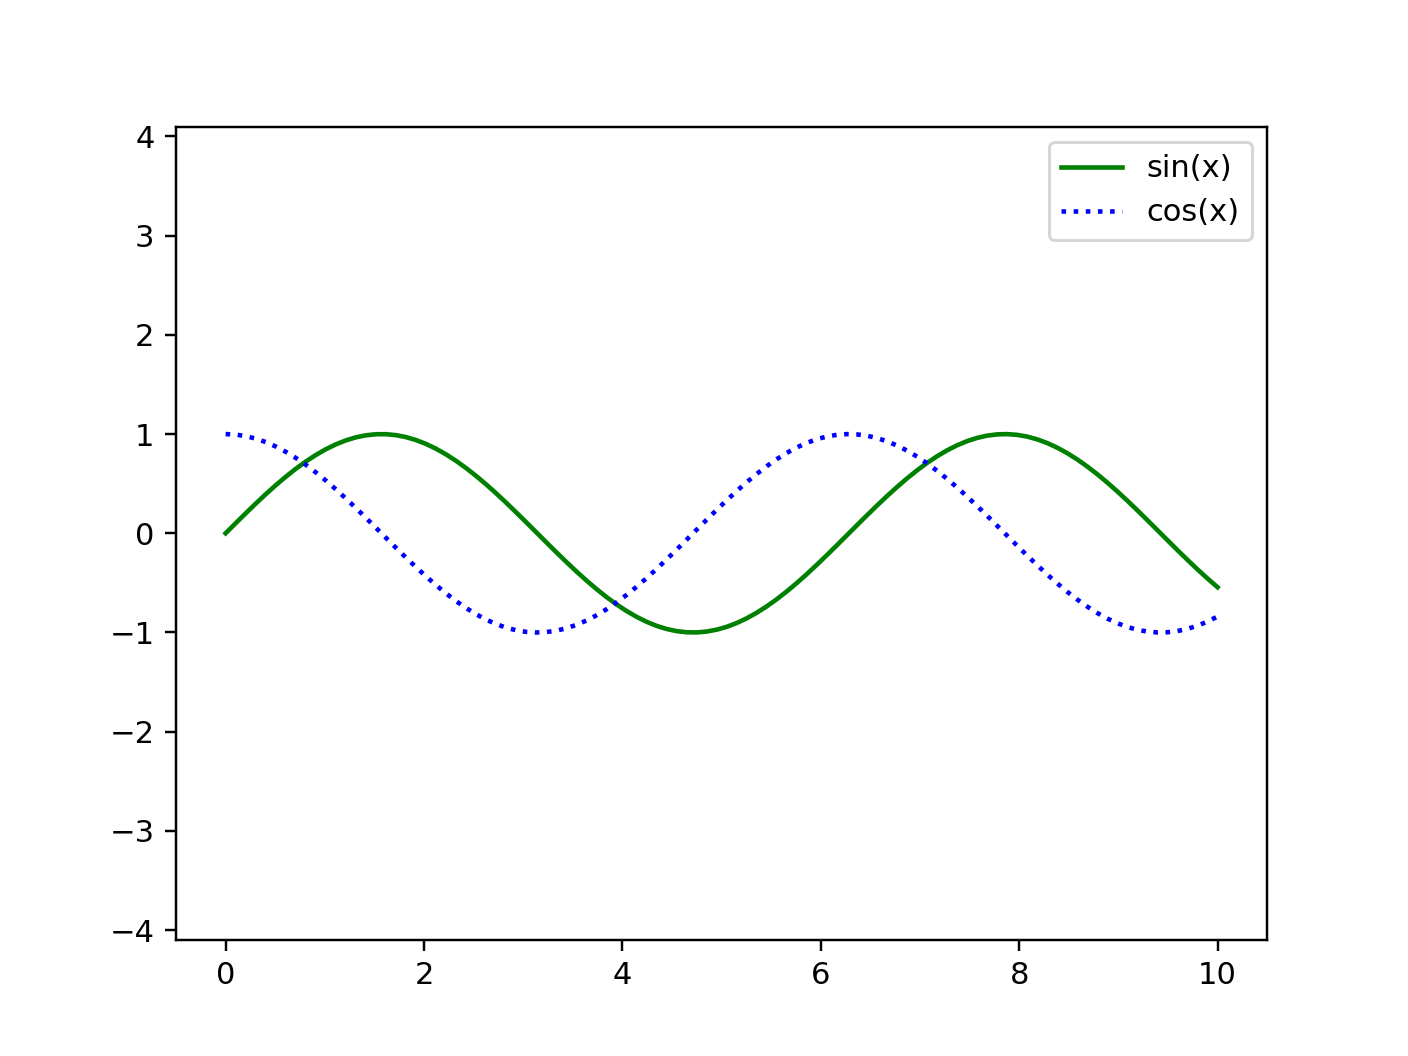

In [19]:
plt.figure ()
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

<font color = green >

### Artist layer sample
</font>

In [23]:
?fig.add_subplot

In [20]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
# create new figure
fig = Figure()
# associate fig with the backend
canvas= FigureCanvasAgg(fig)
# add subplot to figure
ax = fig.add_subplot(111)
ax.plot(3,2,'.')
# create the png file
canvas.print_png('test.png') # the backend that for the jupiter notebooks, isn't able to render this directly.

In [21]:
%%html
<img src = "test.png">

<font color = green >

### gca (get current axis)
</font>

<IPython.core.display.Javascript object>


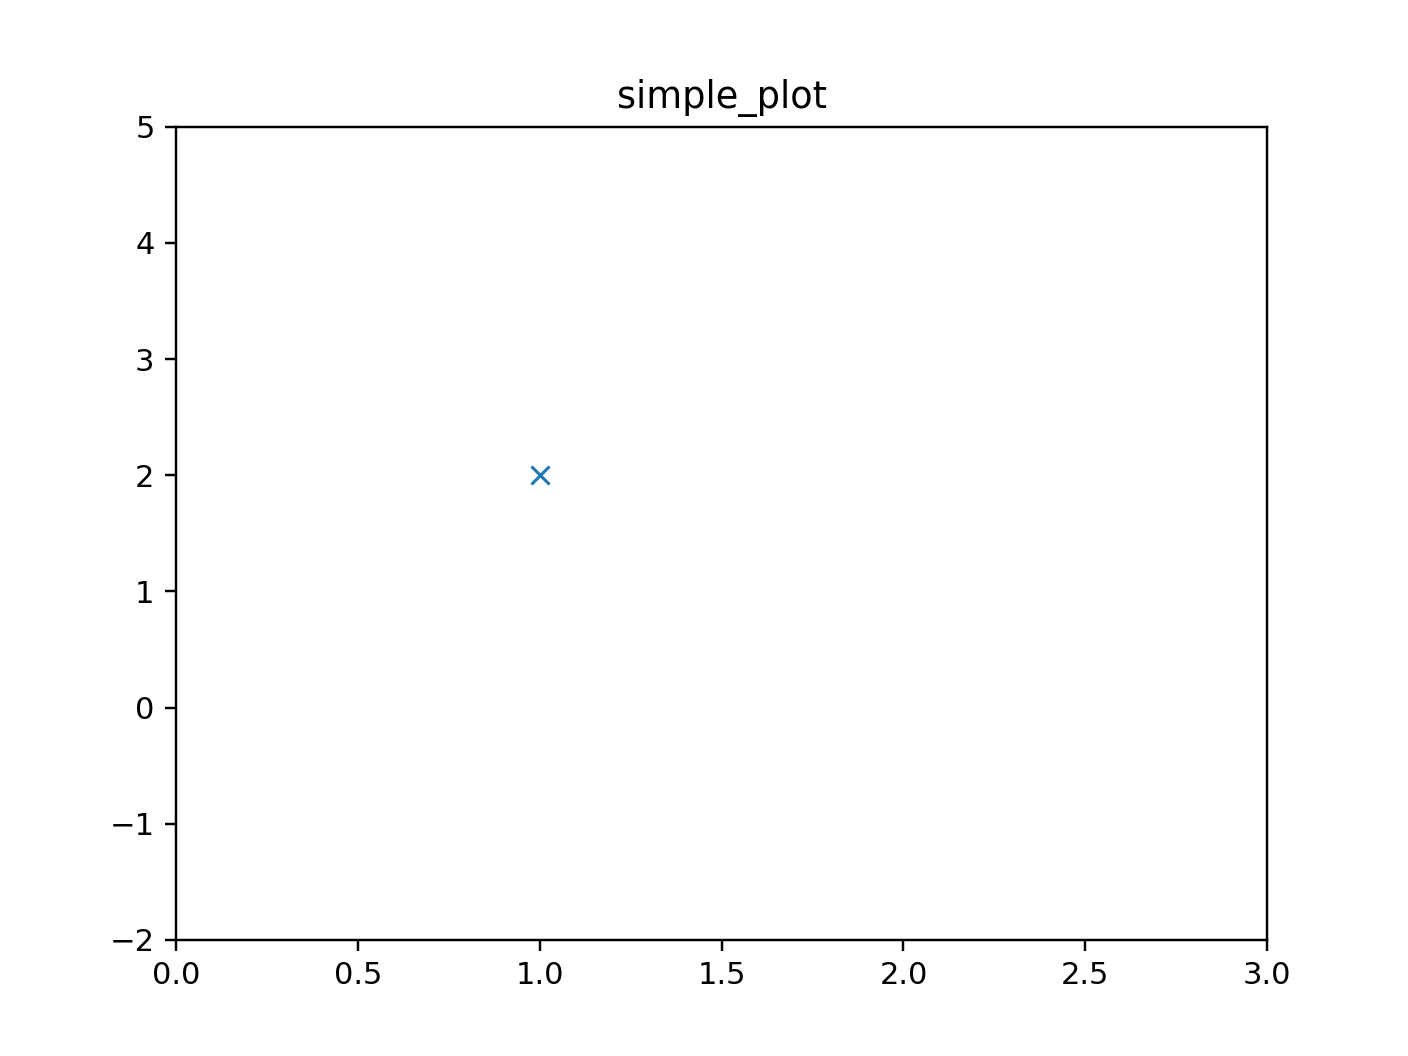

[0, 3, -2, 5]

In [24]:
# scripting layer 
plt.figure()
plt.title('simple_plot')
plt.plot(1,2,'x')

# go down to artist layer 
ax= plt.gca() # get current axis 
ax.axis([0,3,-2,5])

In [25]:
ax.get_children()
# line 2D is the data points 
# spines are the borders
# two lables for axis objects and title 
# texts are labels for the chart. 
# rectangle is the background for the axis

 Text(0.5, 1, 'simple_plot'),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

<font color = green >

### Multi axes
</font>

<IPython.core.display.Javascript object>


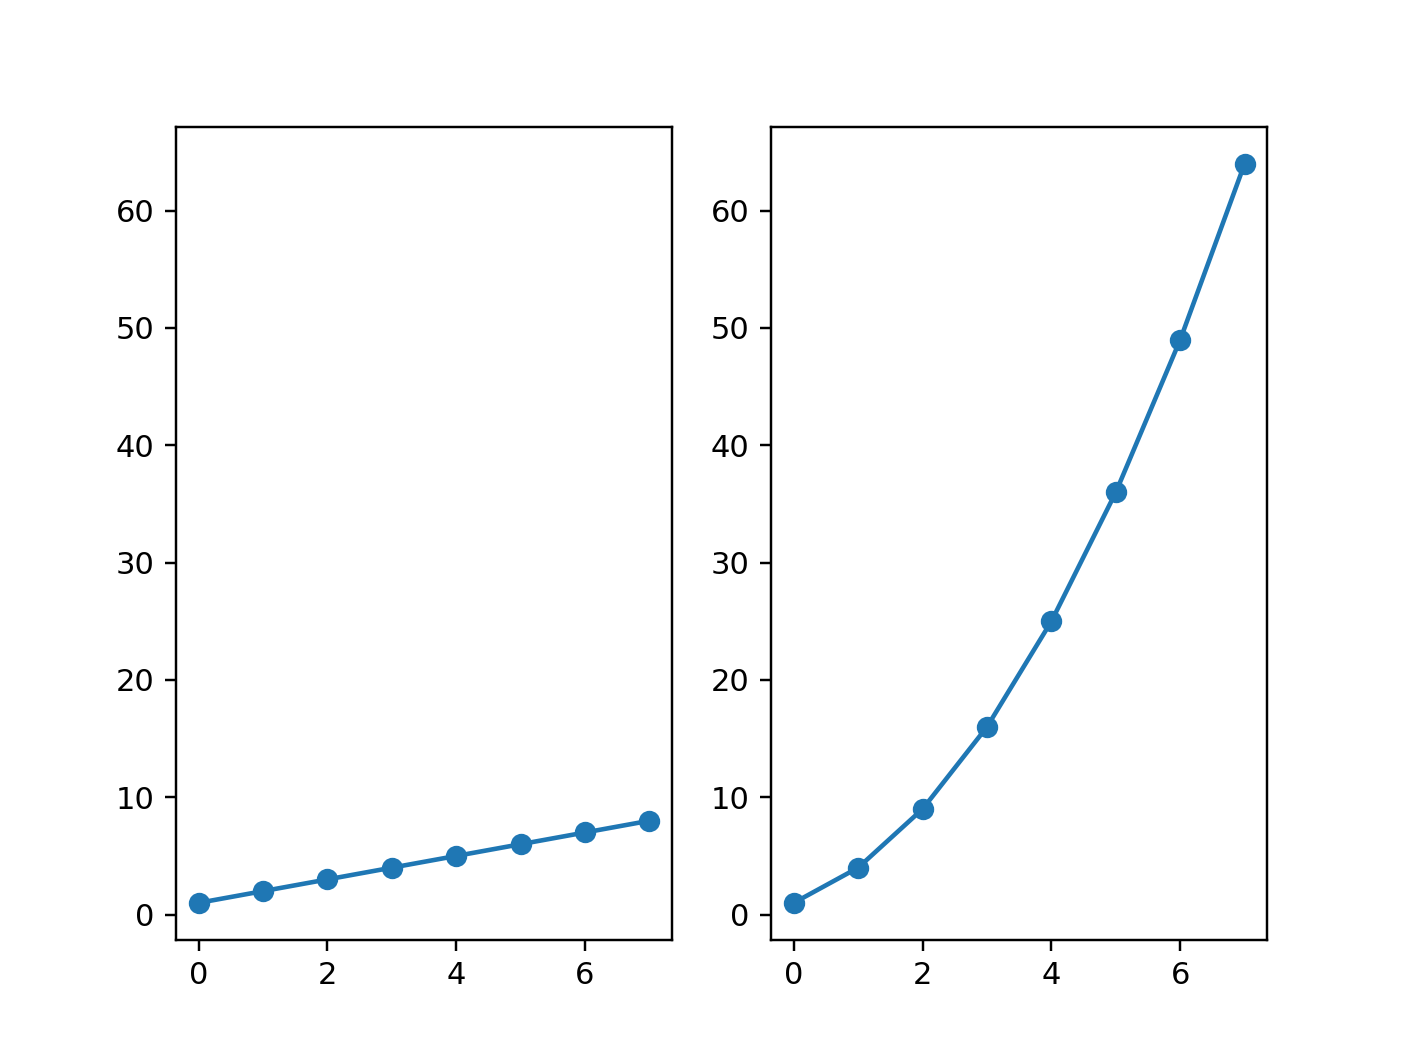

In [30]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
exponential_data = linear_data ** 2
ax1.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey=ax1) # Note shared y axis
ax2.plot(exponential_data, '-o')

In [31]:
plt.gcf().get_axes() 

<font color = green >

### sca (set current asix)
</font>

In [32]:
print (plt.gca())
plt.sca(ax1) # set current axis as active
# print (plt.gca())

AxesSubplot(0.547727,0.11;0.352273x0.77)


<font color = green >

### gcf ( get current figure)
</font>

In [33]:
plt.gcf().canvas

<font color = green >

### Structure summary 
</font>

<b>scripting layer - for most usage. Note : it captures current figure and current axis </b>
<br>&emsp;&emsp;`plt`
<br>&emsp;&emsp;&emsp;&emsp;how to get: import matplotlib.pyplot as plt 
<br>&emsp;&emsp;&emsp;&emsp;samples: `plt.plot, plt.title, plt.show, plt.text, plt.tick_params, etc.`)
<br><b>artist layer - use for more complicated / for tuning </b>
<br>&emsp;&emsp;`axis` 
<br>&emsp;&emsp;&emsp;&emsp;how to get: fig.add_subplot() / plt.gca() / plt.gcf().get_axes()
<br>&emsp;&emsp;&emsp;&emsp;samples: ax.spines, ax.axis, ax.get_xbound, ax.arrow, ax.set_title, ax.set_ylabel etc.) 
<br>&emsp;&emsp;`figure` 
<br>&emsp;&emsp;&emsp;&emsp;how to get: from matplotlib.figure import Figure / plt.figure / plt.gcf()
<br>&emsp;&emsp;&emsp;&emsp;samples: FigureCanvasAgg(fig), fig.add_subplot, fig.savefig, fig.canvas, etc.) </li>
<br><b>backend layer - use for configuration / for tuning </b>
<br>&emsp;&emsp;`canvas` 
<br>&emsp;&emsp;&emsp;&emsp;how to get: import matplotlib as mpl
<br>&emsp;&emsp;&emsp;&emsp;samples: mpl.cm, mpl.colors, mpl.colorbar  etc.)

*** 
<font color = green >

## Major drawing types  
</font>


<font color = green >

### Scatter
</font>

<IPython.core.display.Javascript object>


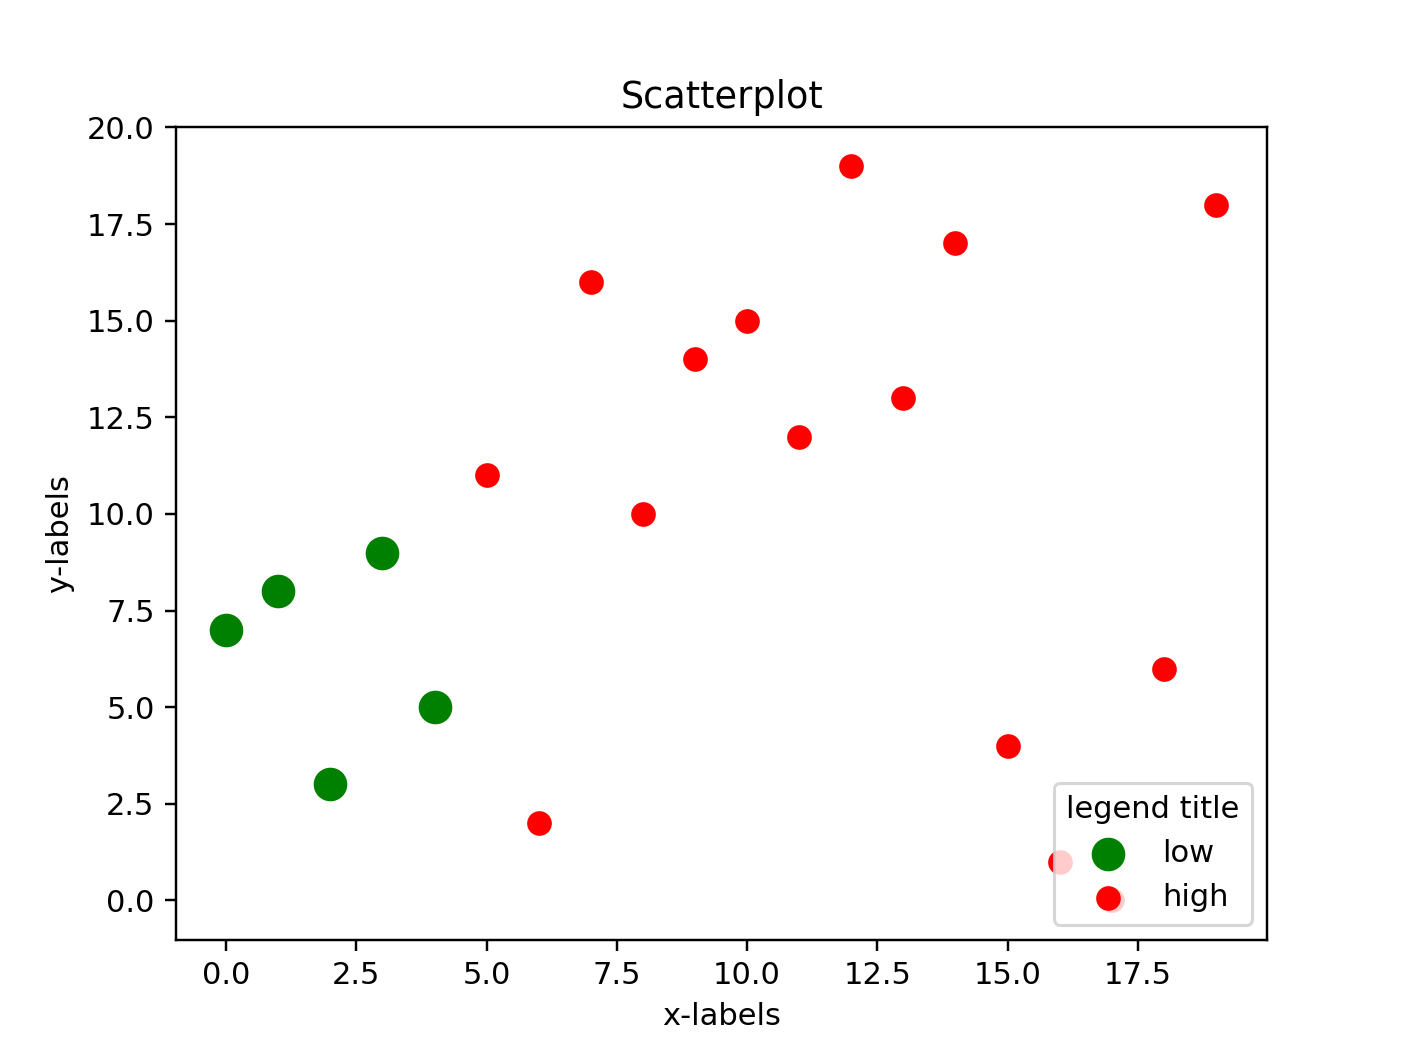

Text(0, 0.5, 'y-labels')

In [36]:
# Use scatter when you don't need to keep consequence of data 

# create some series for x-vals 
x= np.arange (20)

# create some series for y-vals 
y=x.copy()
np.random.shuffle(y)

# create new figure
plt.figure()

# draw 2 scatters  
plt.scatter(x[:5],y[:5],c = 'g',s = 100,label= 'low')  
plt.scatter(x[5:],y[5:],c = 'r',s = 50,label= 'high')

plt.title('Scatterplot')

plt.legend(loc = 4, title= 'legend title')
plt.xlabel('x-labels')
plt.ylabel('y-labels')



The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

<IPython.core.display.Javascript object>


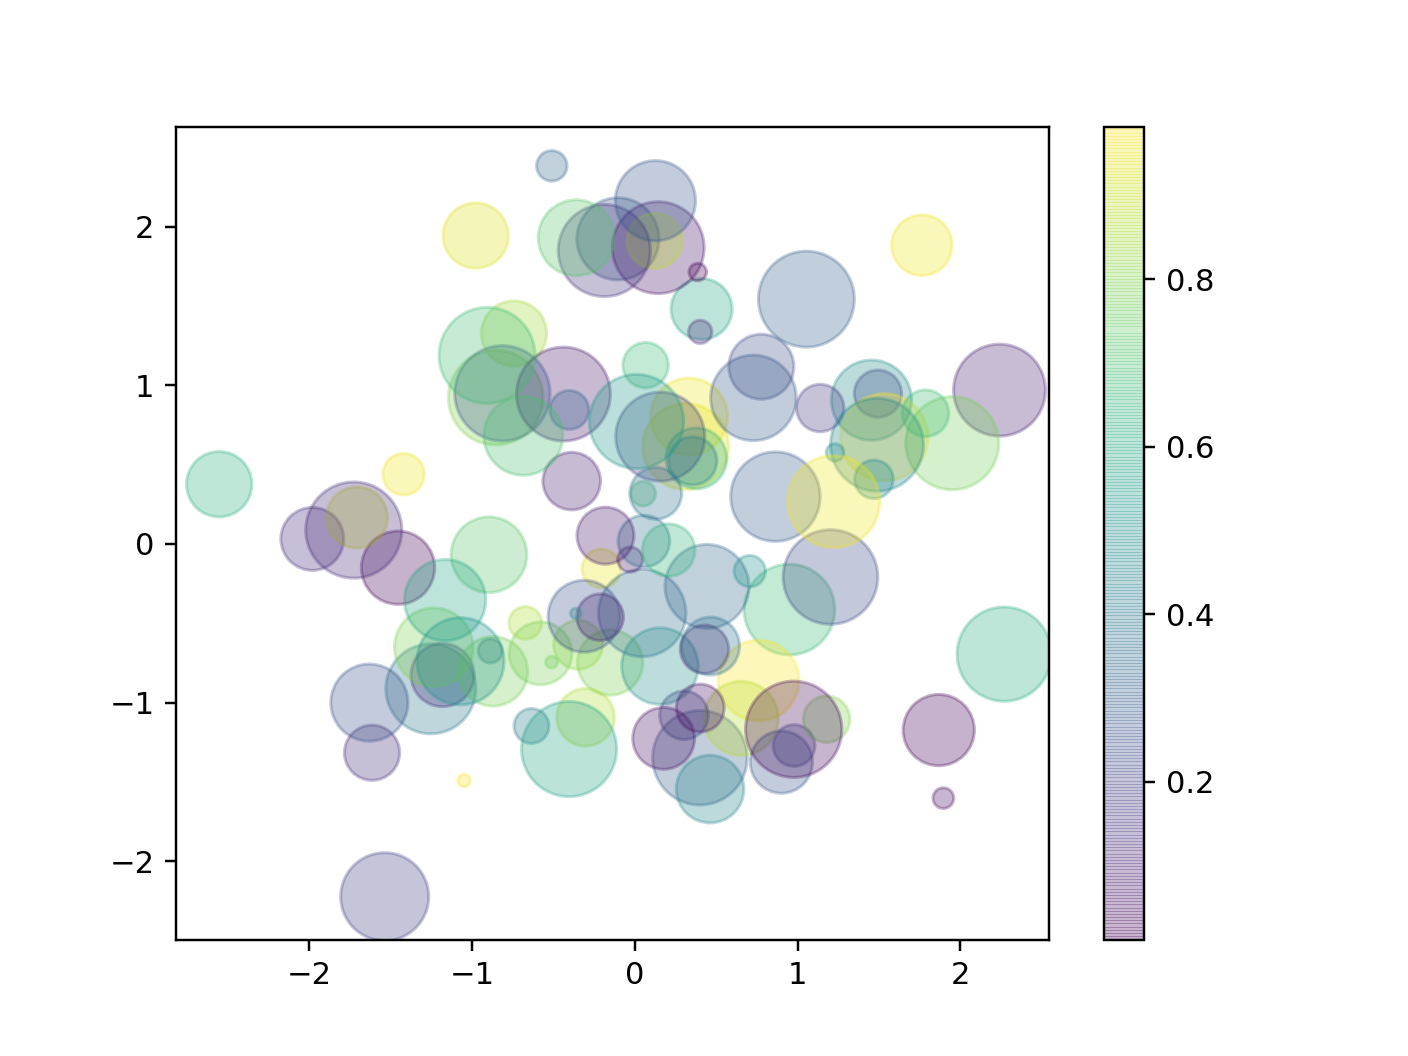

In [37]:
plt.figure ()
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
           cmap='viridis')
plt.colorbar(); # show color scale


<font color = green >

### Plot 
</font>

<IPython.core.display.Javascript object>


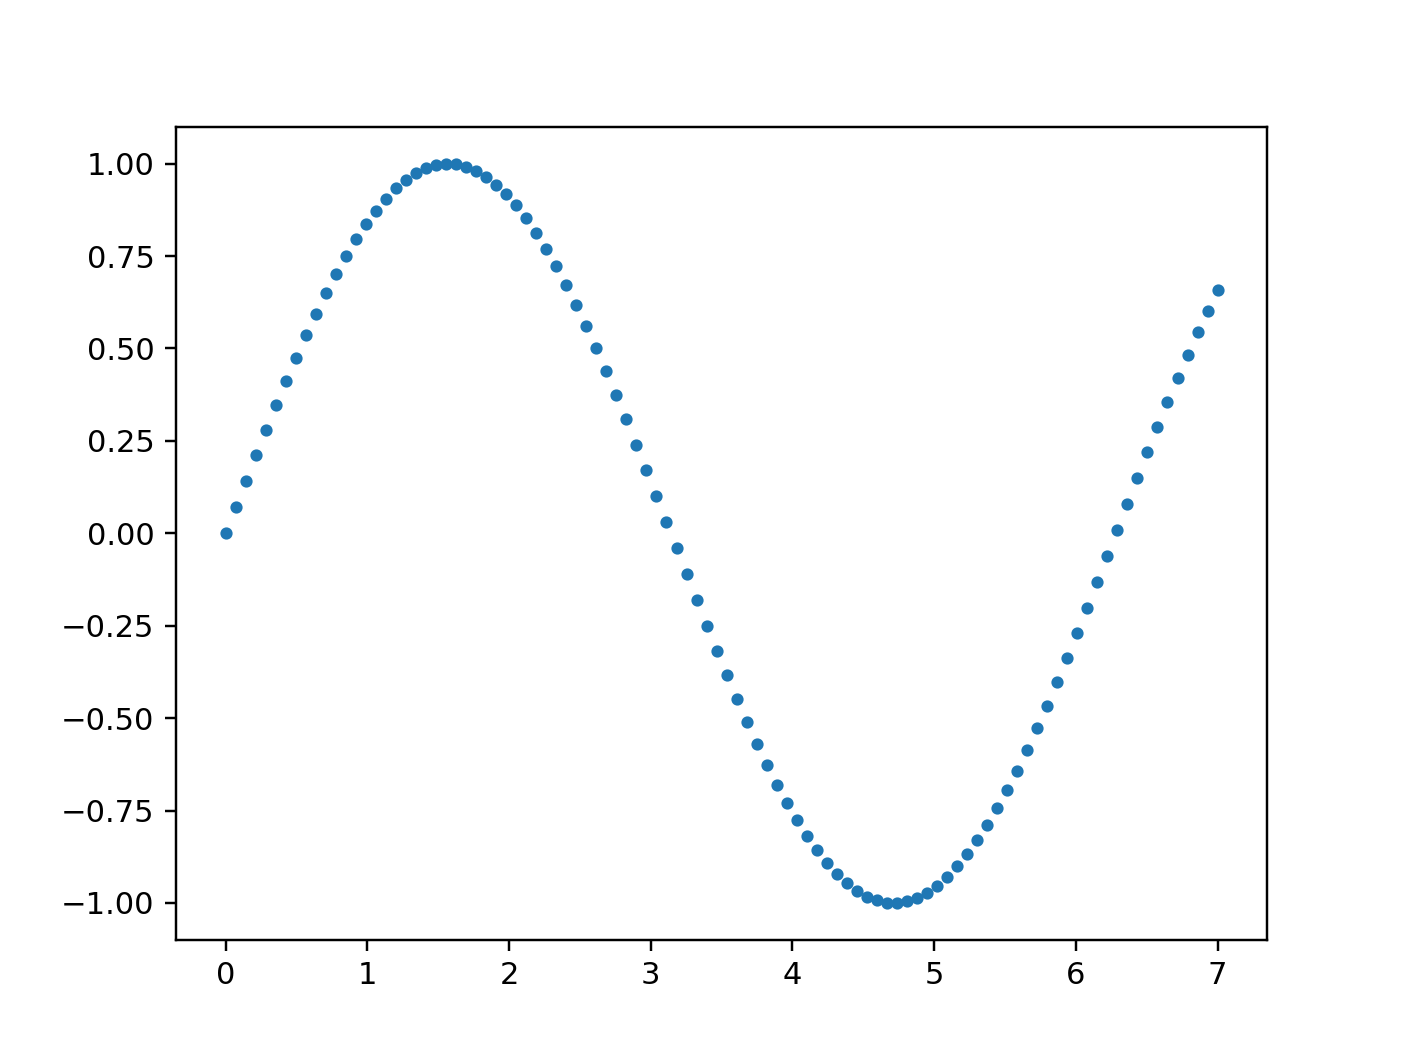

In [38]:
# Use plot to keep consequence of data 
plt.figure() 
x = np.linspace(0,7,100)
sin_x = np.sin(x)
plt.plot(x, sin_x, '.')

<IPython.core.display.Javascript object>


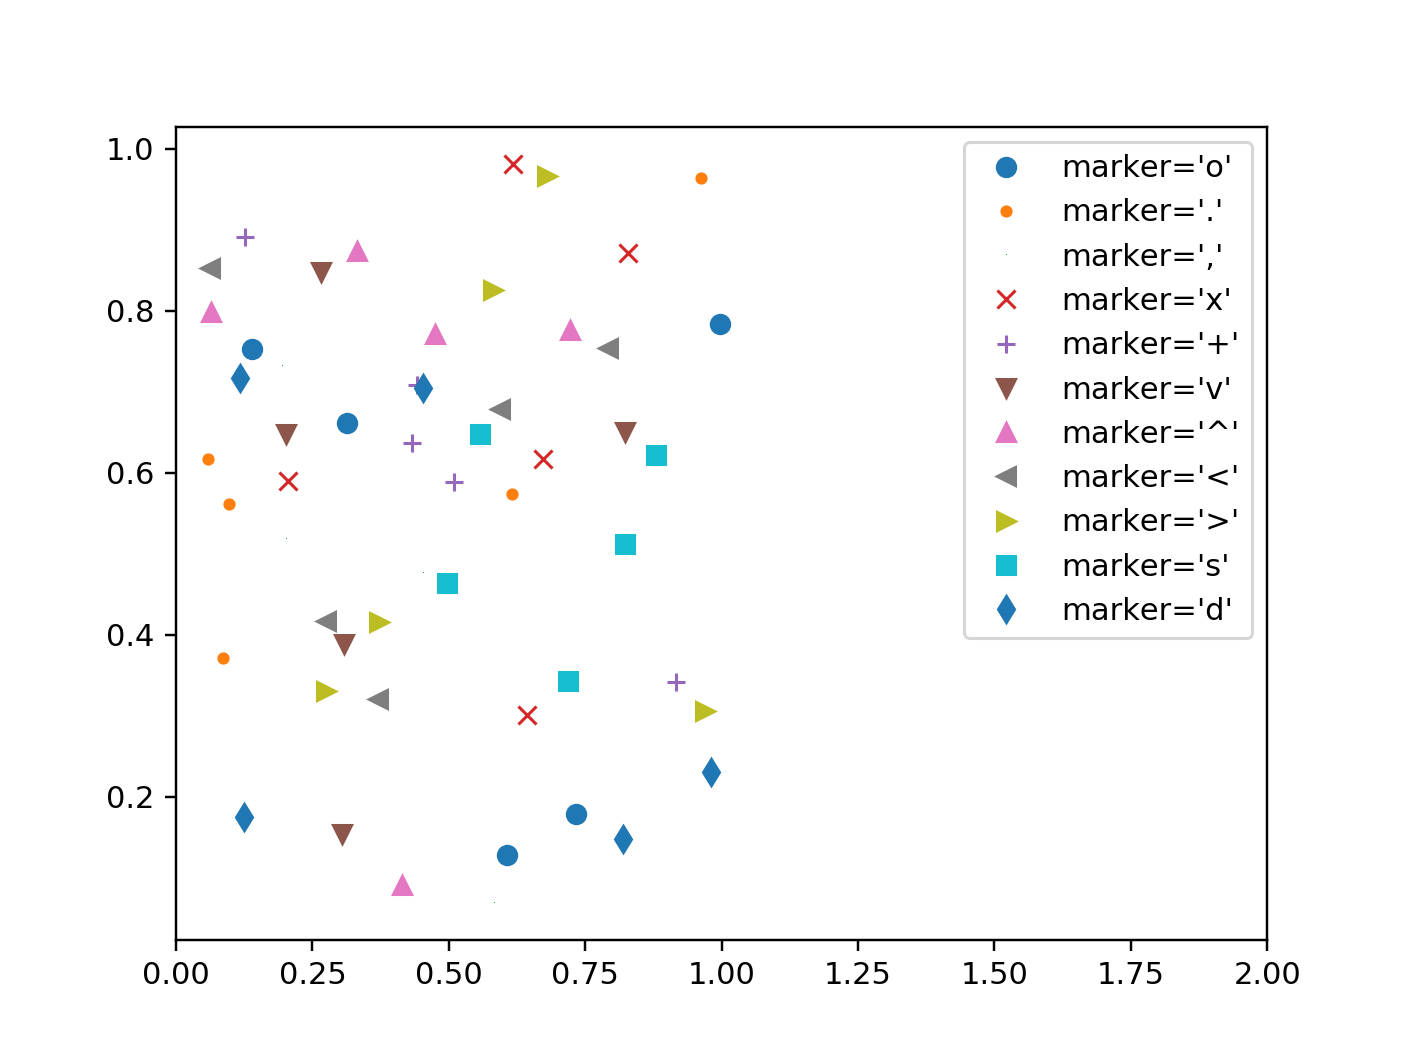

In [39]:
plt.figure ()
rng = np.random.RandomState(2021)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
            label=f"marker='{marker}'")
    
    plt.legend(numpoints=1)
    plt.xlim(0, 2);

<IPython.core.display.Javascript object>


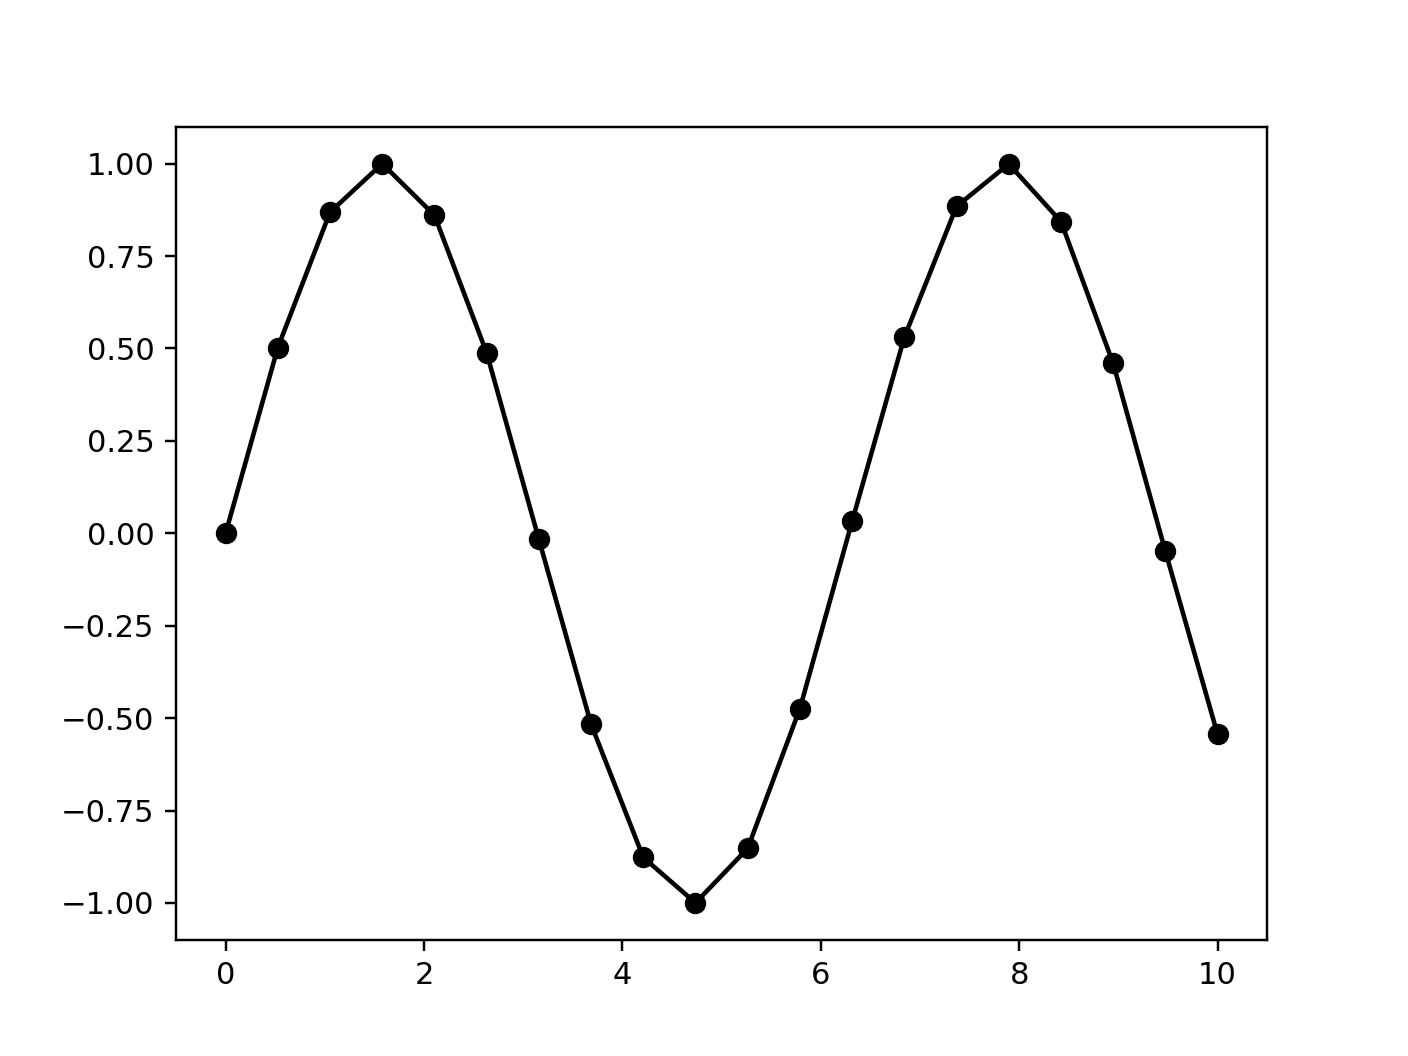

In [41]:
plt.figure ()
x = np.linspace(0, 10, 20)
y = np.sin(x)
plt.plot(x, y, '-ok'); # line (-), circle marker (o), black (k)

<IPython.core.display.Javascript object>


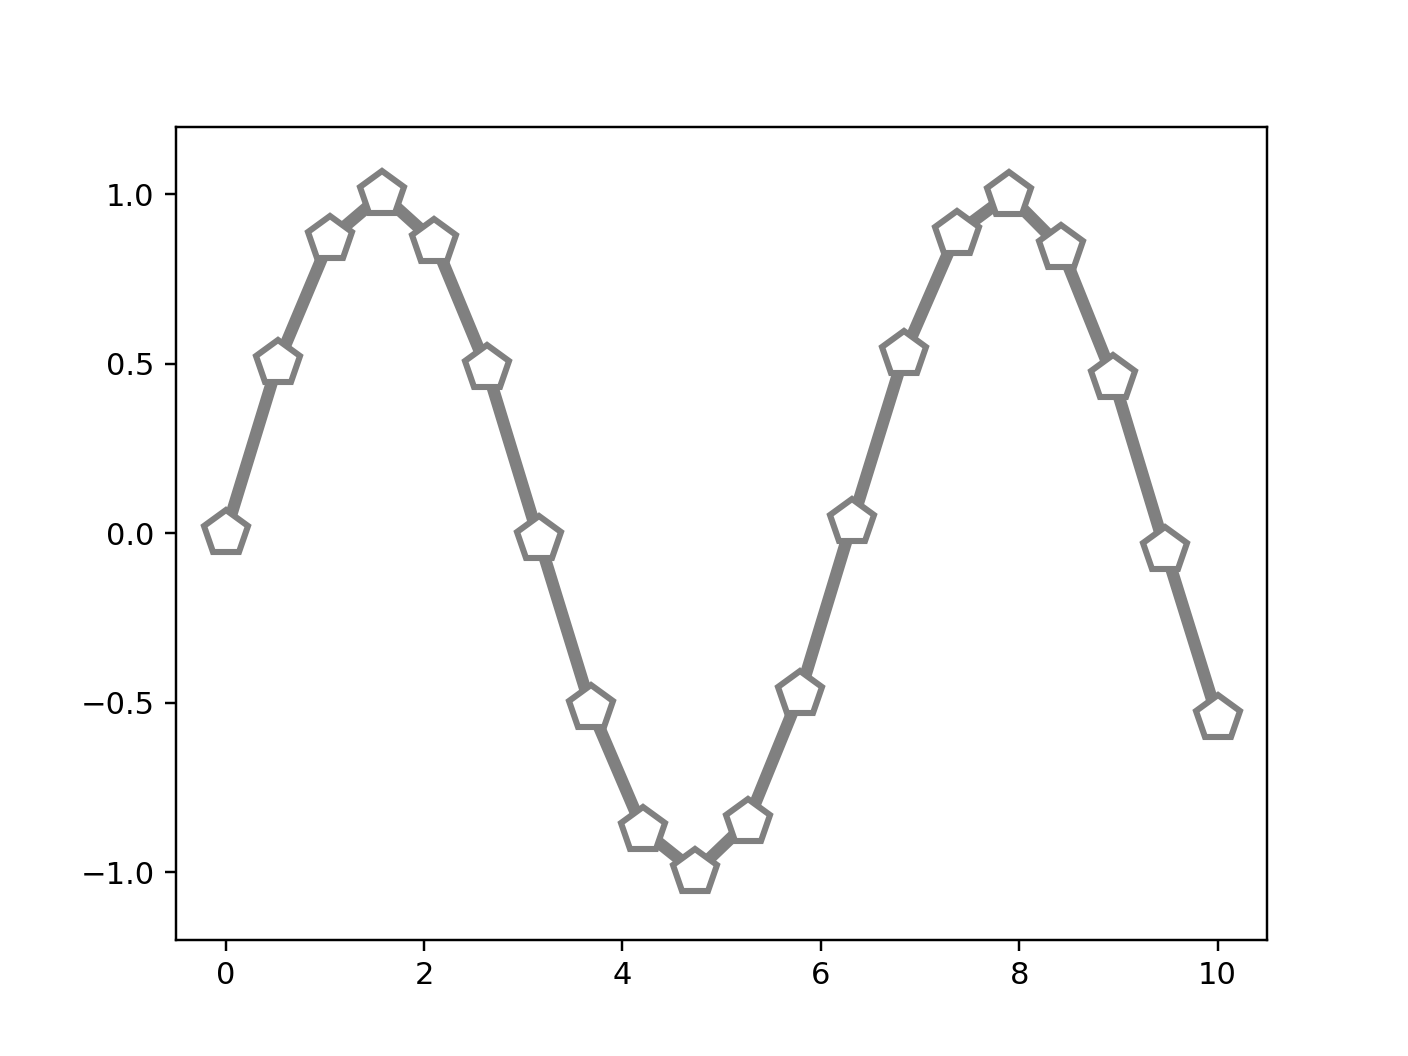

In [43]:
plt.figure()
plt.plot(x, y, '-p', color='gray',
            markersize=15, linewidth=4,
            markerfacecolor='white',
            markeredgecolor='gray',
            markeredgewidth=2)

plt.ylim(-1.2, 1.2);


<font color = green >

#### fill_between
</font>

<IPython.core.display.Javascript object>


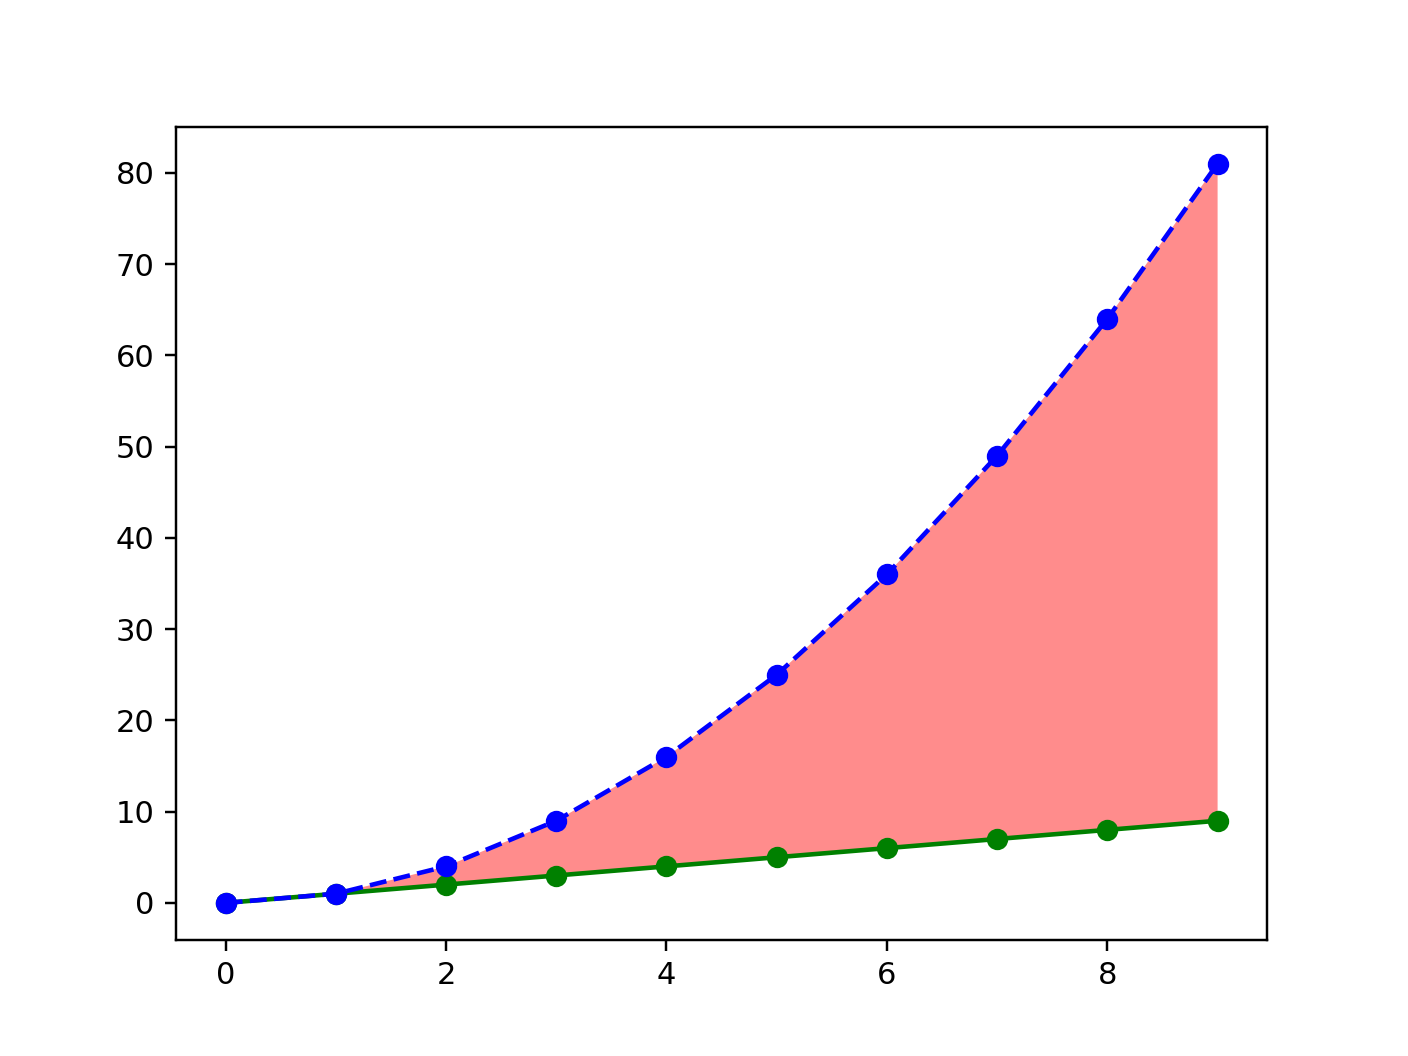

In [47]:
plt.figure()
linear_data = np.arange(10)
exponential_data = linear_data ** 2
plt.plot(linear_data, '-og')
plt.plot(exponential_data, '--ob')
plt.fill_between(range(10),linear_data, exponential_data, facecolors='red',alpha=0.45)  


<font color = green >

### Barchart 
</font>

<IPython.core.display.Javascript object>


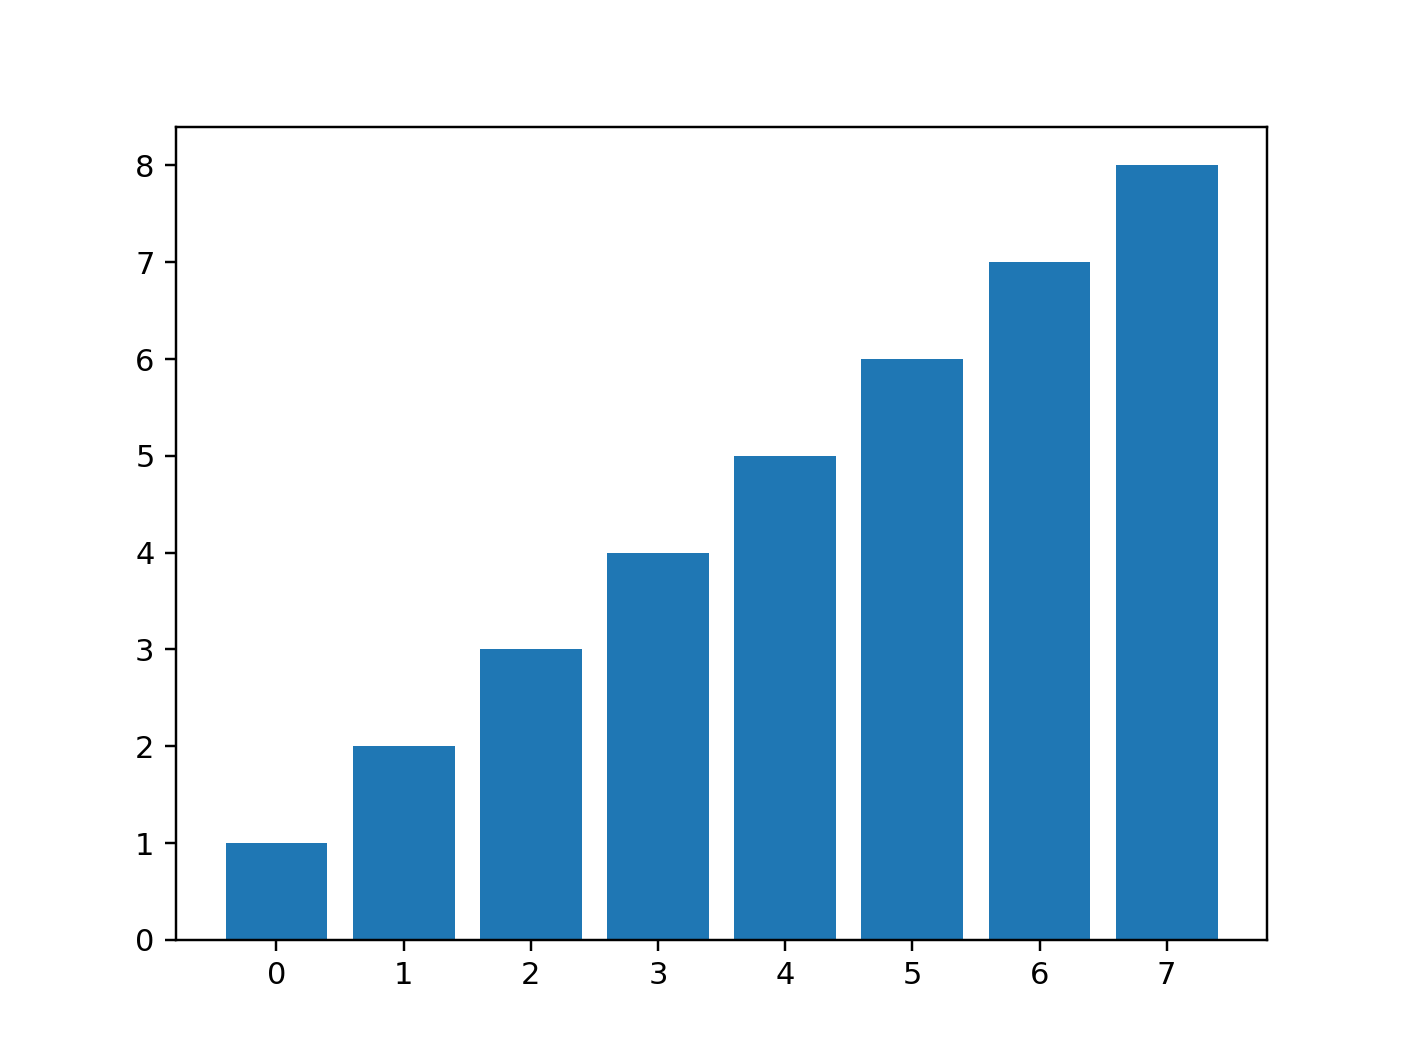

<BarContainer object of 8 artists>

In [51]:
plt.figure()
linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
quadratic_data = linear_data ** 2
x_vals = np.arange(len(linear_data))
plt.bar(x_vals, linear_data) # , width= 0.1)


<font color = green >

#### Horizontal barchart 
</font>

<IPython.core.display.Javascript object>


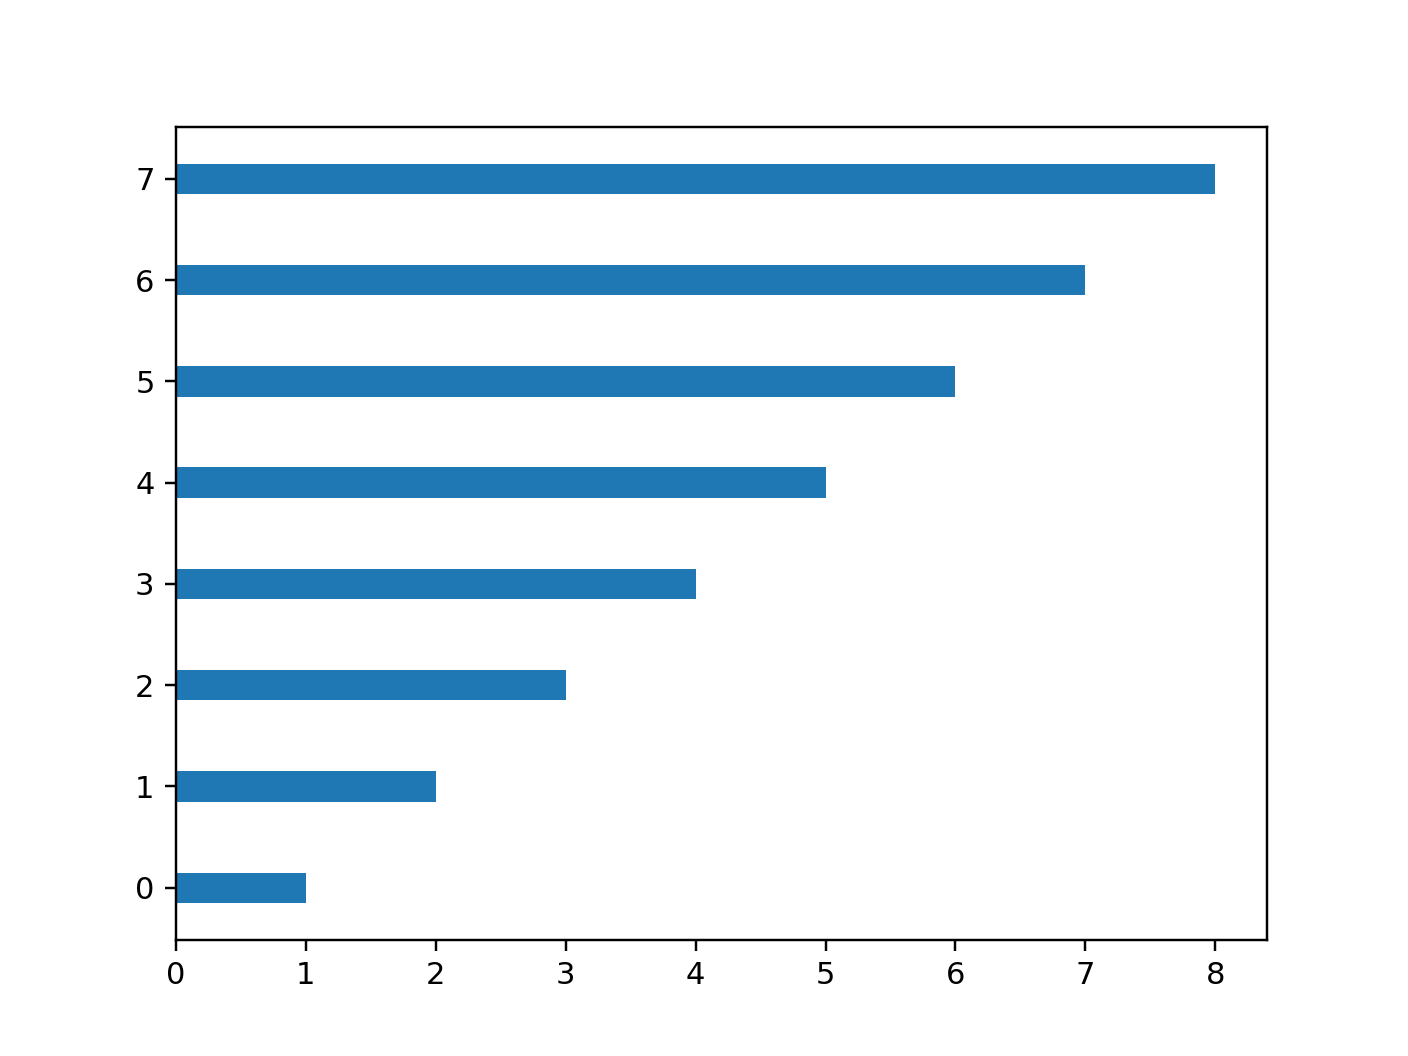

<BarContainer object of 8 artists>

In [49]:
plt.figure()
plt.barh(x_vals, linear_data, height=0.3)


<font color = green >

#### Difference on barchart 
</font>

<IPython.core.display.Javascript object>


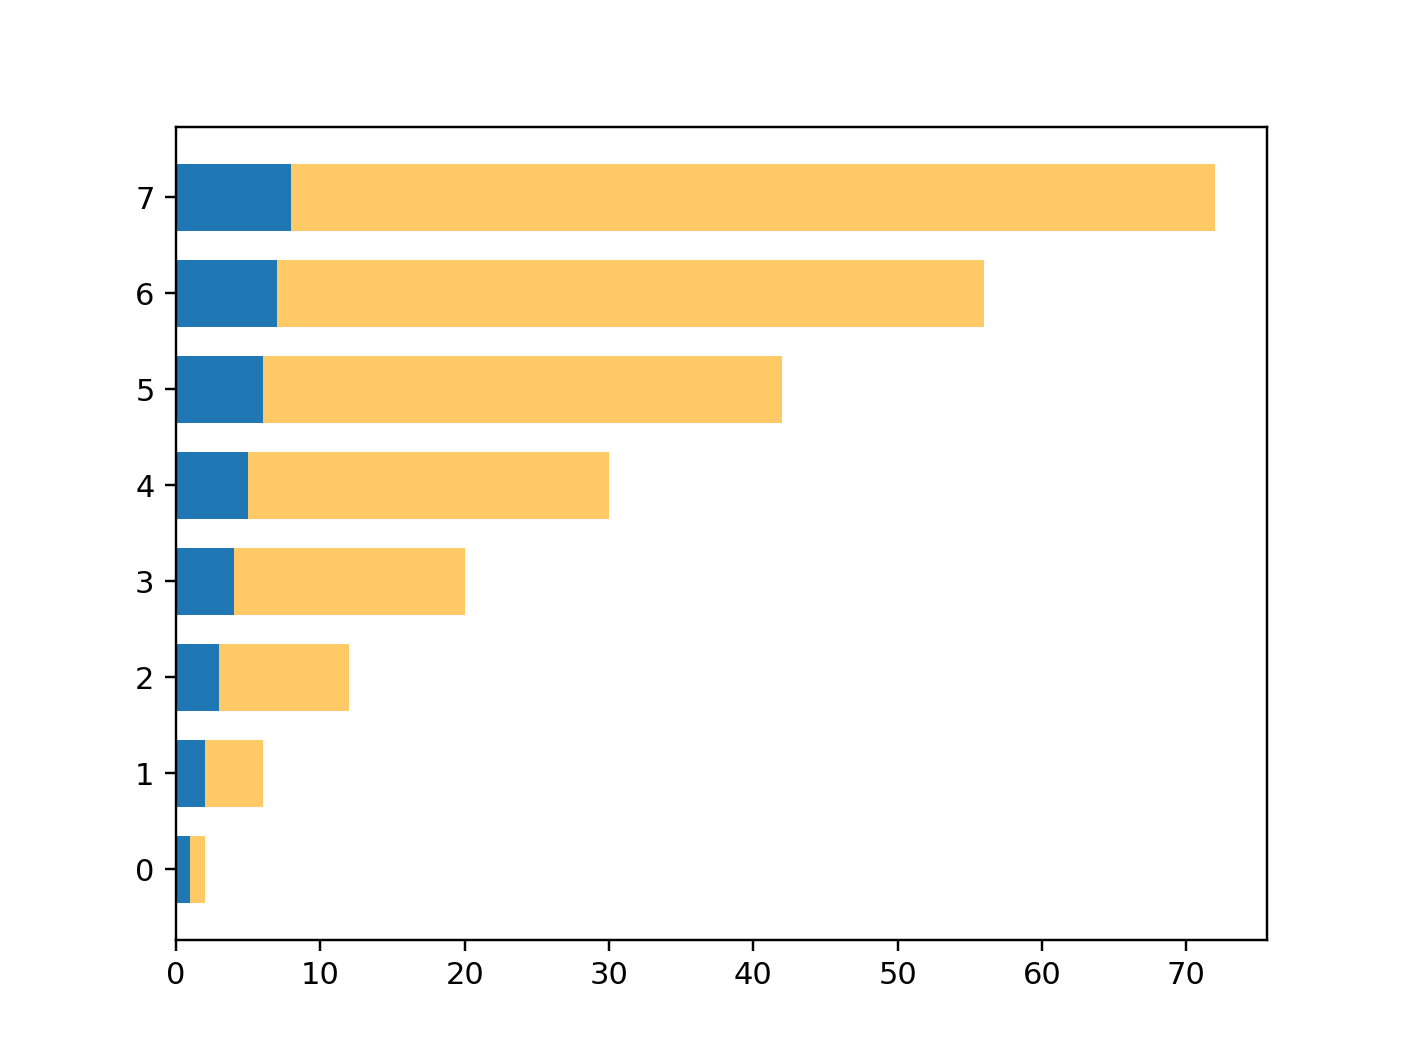

<BarContainer object of 8 artists>

In [52]:
plt.figure()
plt.barh(x_vals, linear_data, height=0.7)
n = len(x_vals)
added_const = np.array([2]* n)
# plt.barh(x_vals, added_const, height=0.7, color='orange', left=linear_data, alpha = .6)
plt.barh(x_vals, quadratic_data, height=0.7, color='orange', left=linear_data, alpha = .6)

<font color = green >

### Histogram
</font>

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


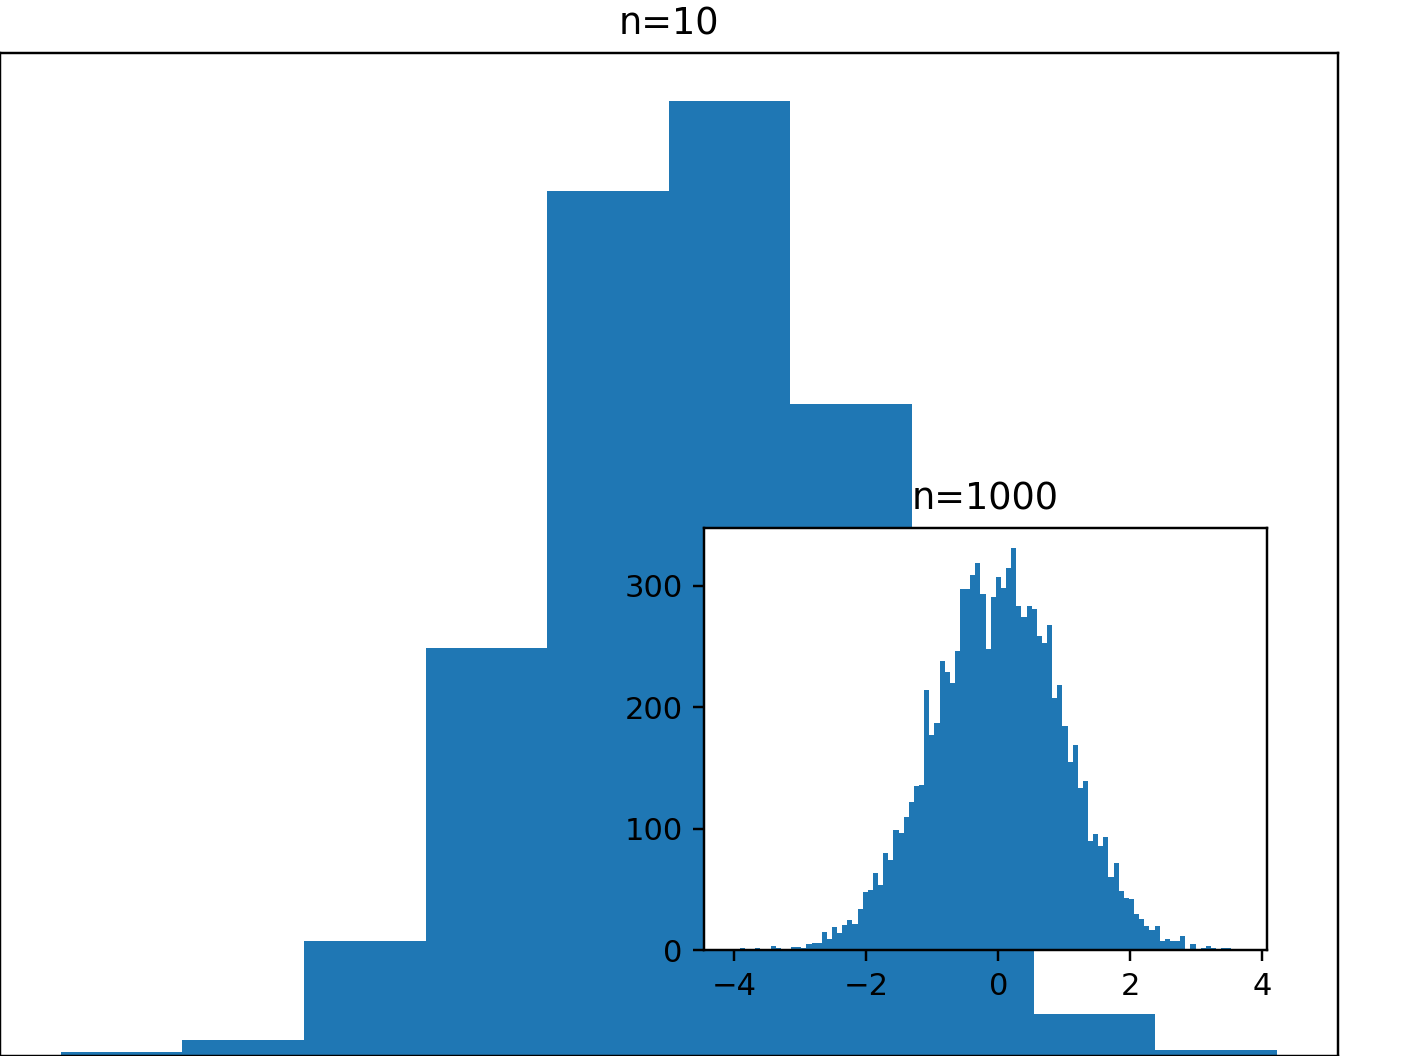

Text(0.5, 1.0, 'n=1000')

In [53]:
fig = plt.figure()
ax1= fig.add_axes([0,0,0.95,.95])
ax2 = fig.add_axes([0.5,0.1,0.4,0.4])
sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
ax1.hist(sample) 
ax1.set_title('n=10')

ax2.hist(sample, bins=100) # hist displays by default 10 bins
ax2.set_title('n=1000')

<font color = green >

### Heatmap
</font>

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


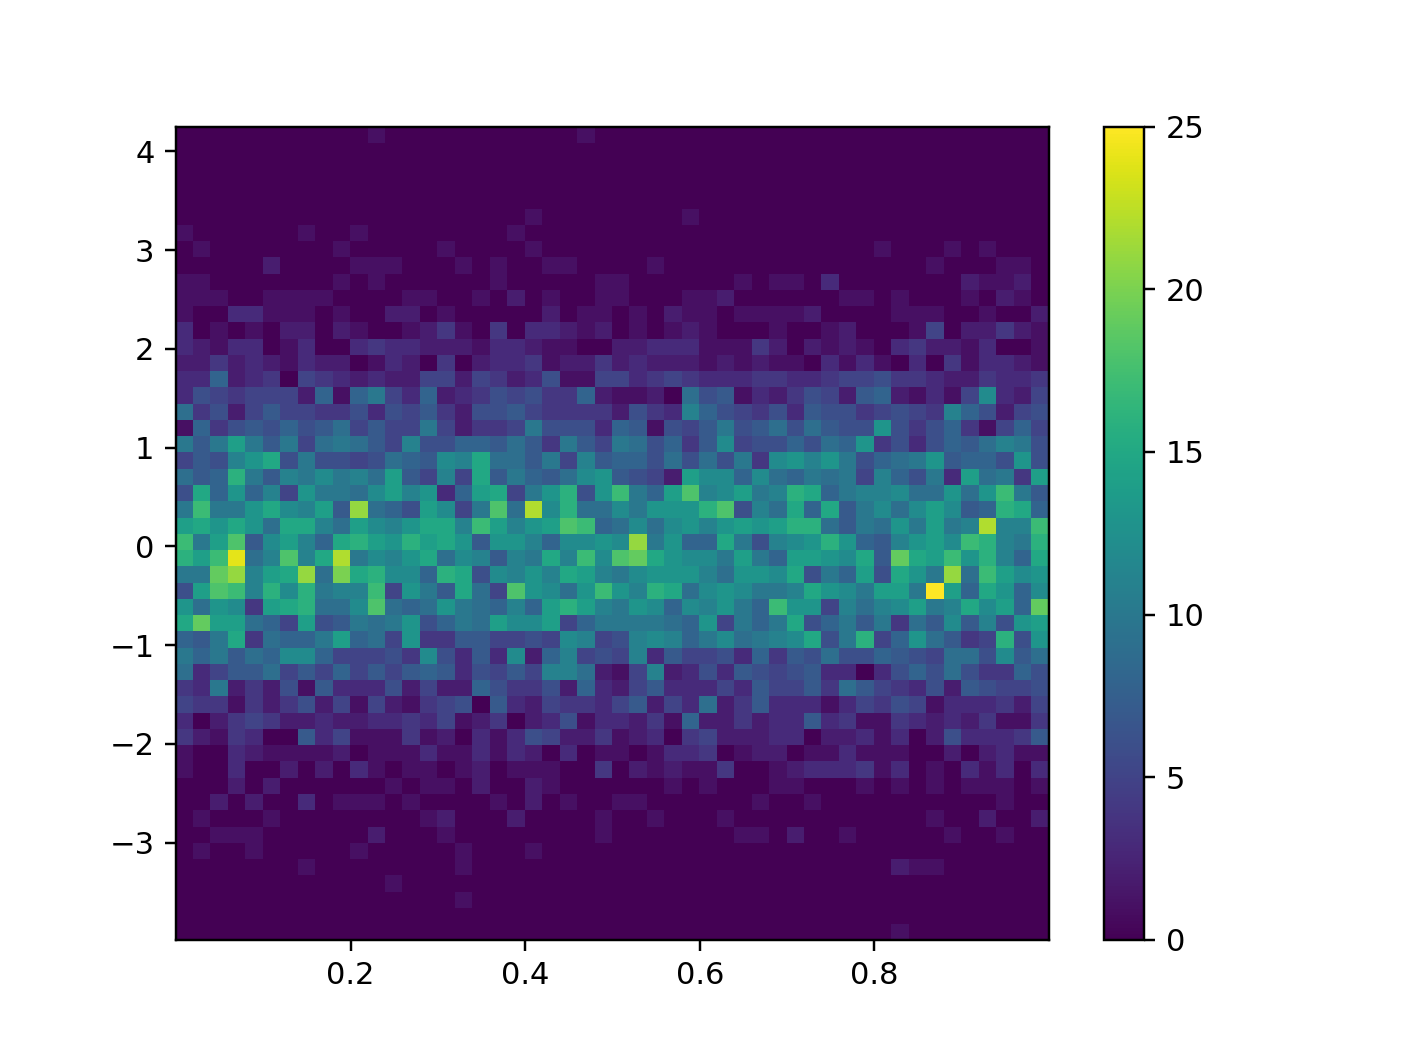

In [54]:
plt.figure()

x = np.random.random(size=10000)
y = np.random.normal(loc=0.0, scale=1.0, size=10000)

plt.hist2d(x, y, bins=50)

plt.colorbar()

***
<font color = green >

## Sublots
</font>

<font color = green >

### sublot
</font>

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


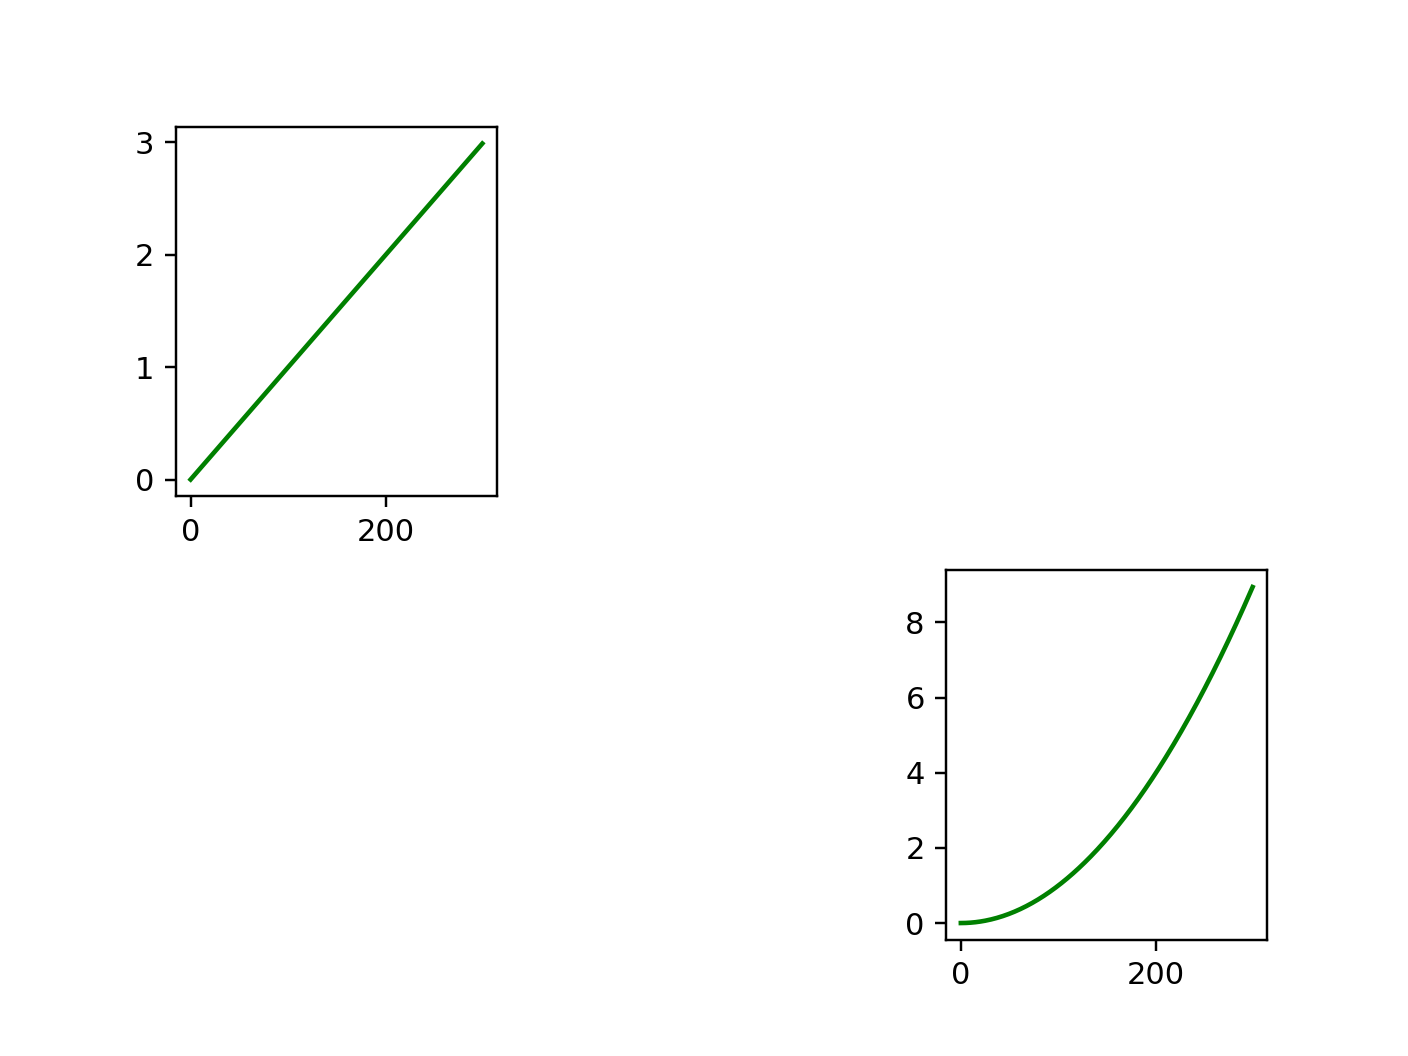

In [57]:
plt.figure()
vals = np.arange(0.0, 3.0, 0.01)
ax2 = plt.subplot(2,3,1) # use 5th cell of created table of 2 rows and  3 columns 
ax3 = plt.subplot(2,3,6) # use 5th cell of created table of 2 rows and  3 columns 
ax2.plot(vals, c='g')
ax3.plot(vals**2, c='g')

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


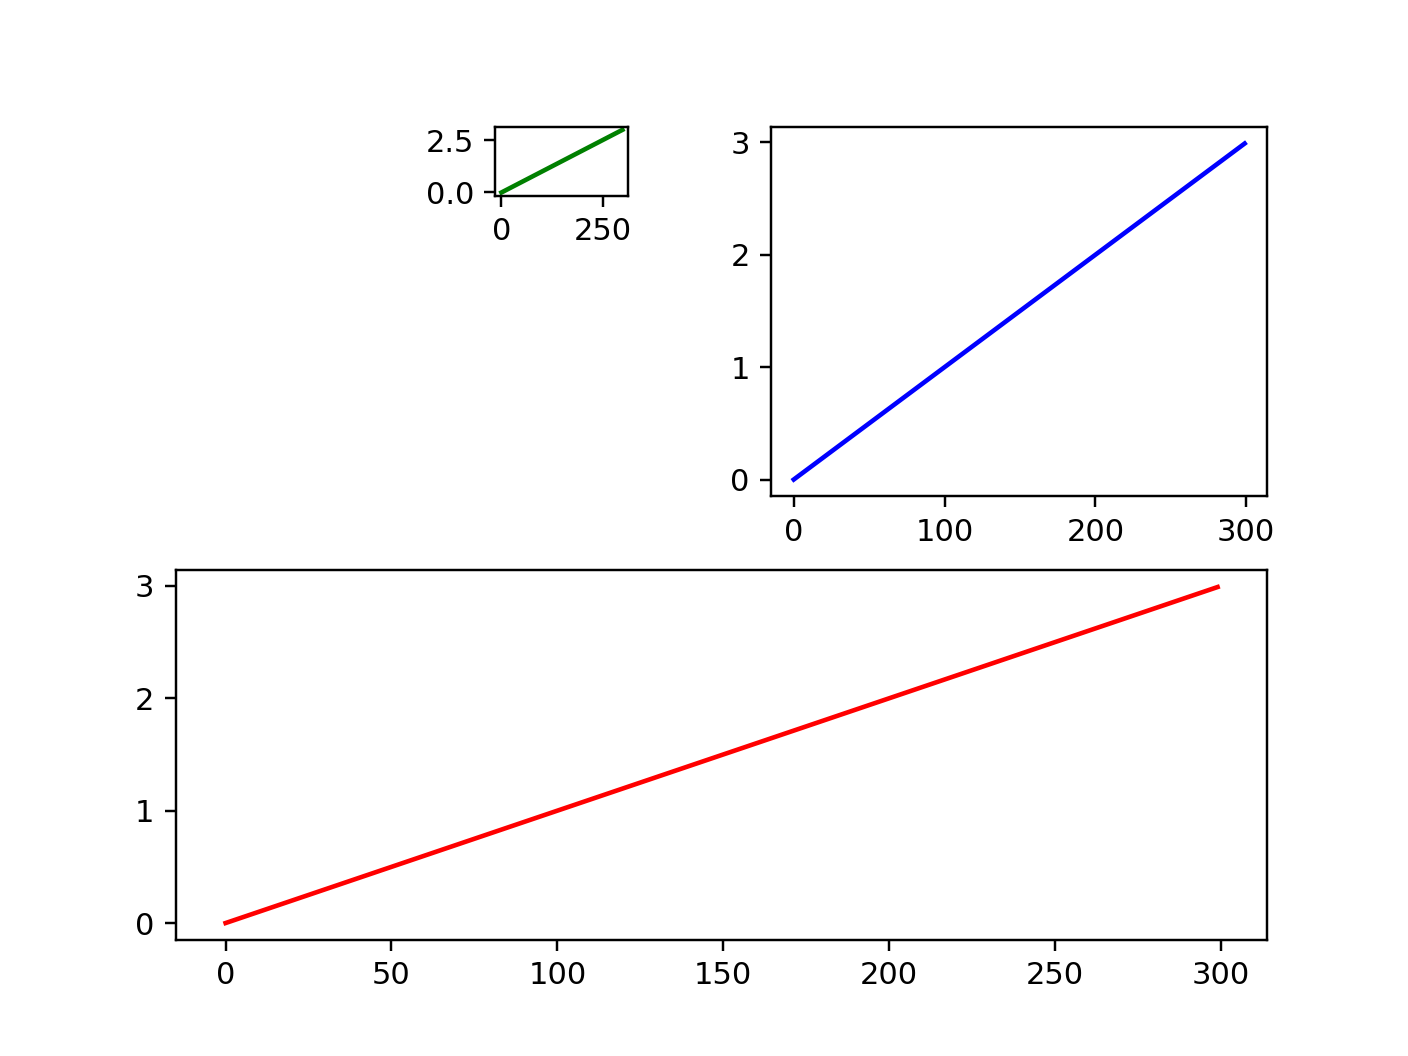

In [61]:
plt.figure()
ax1 = plt.subplot(212)  # create 2 cells and  use 2nd
ax1.plot(vals, c='r')

ax2 = plt.subplot(10,7,3) # create 4 cells and  use 1st
ax2.plot(vals, c='g')

ax3 = plt.subplot(222) # create 4 cells and  use 2nd
ax3.plot(vals, c='b')

<font color = green >

### sublots
</font>

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


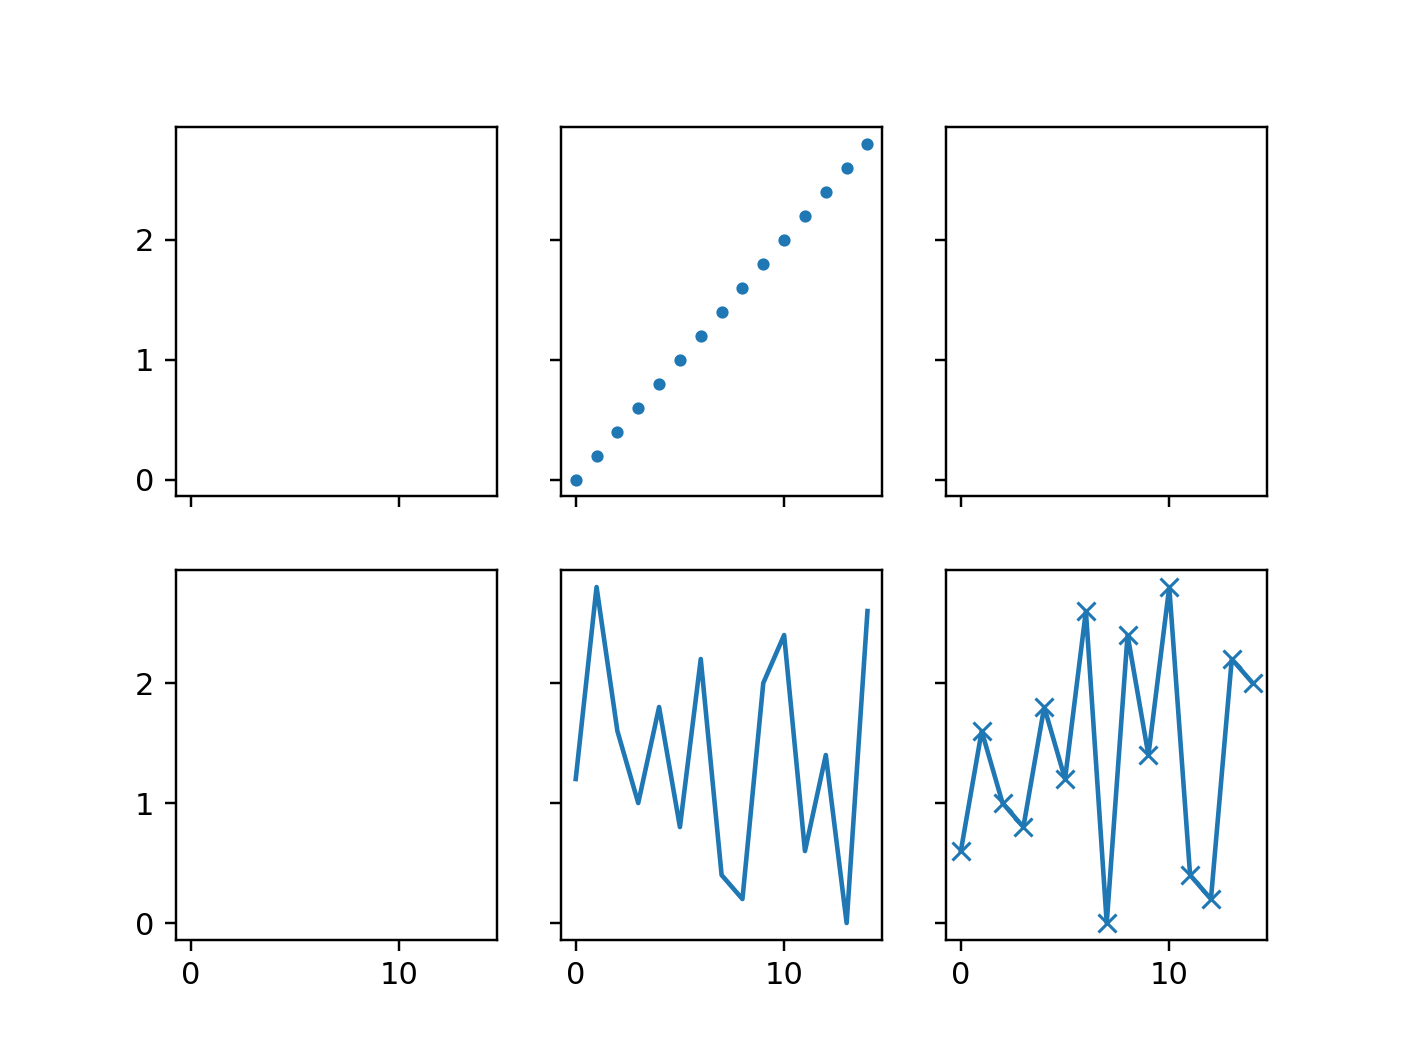

In [62]:
# Note: it returns not only axes but figure as first el of tuple 
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True) # Note : this creates new figure
vals = np.arange(0.0, 3.0, 0.2)
plt.plot(np.random.permutation(vals), '-x') # Note: the last axis is active 
ax2.plot(vals, '.')
ax5.plot(np.random.permutation(vals), '-')

<font color = green >

### gridspec
</font>

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


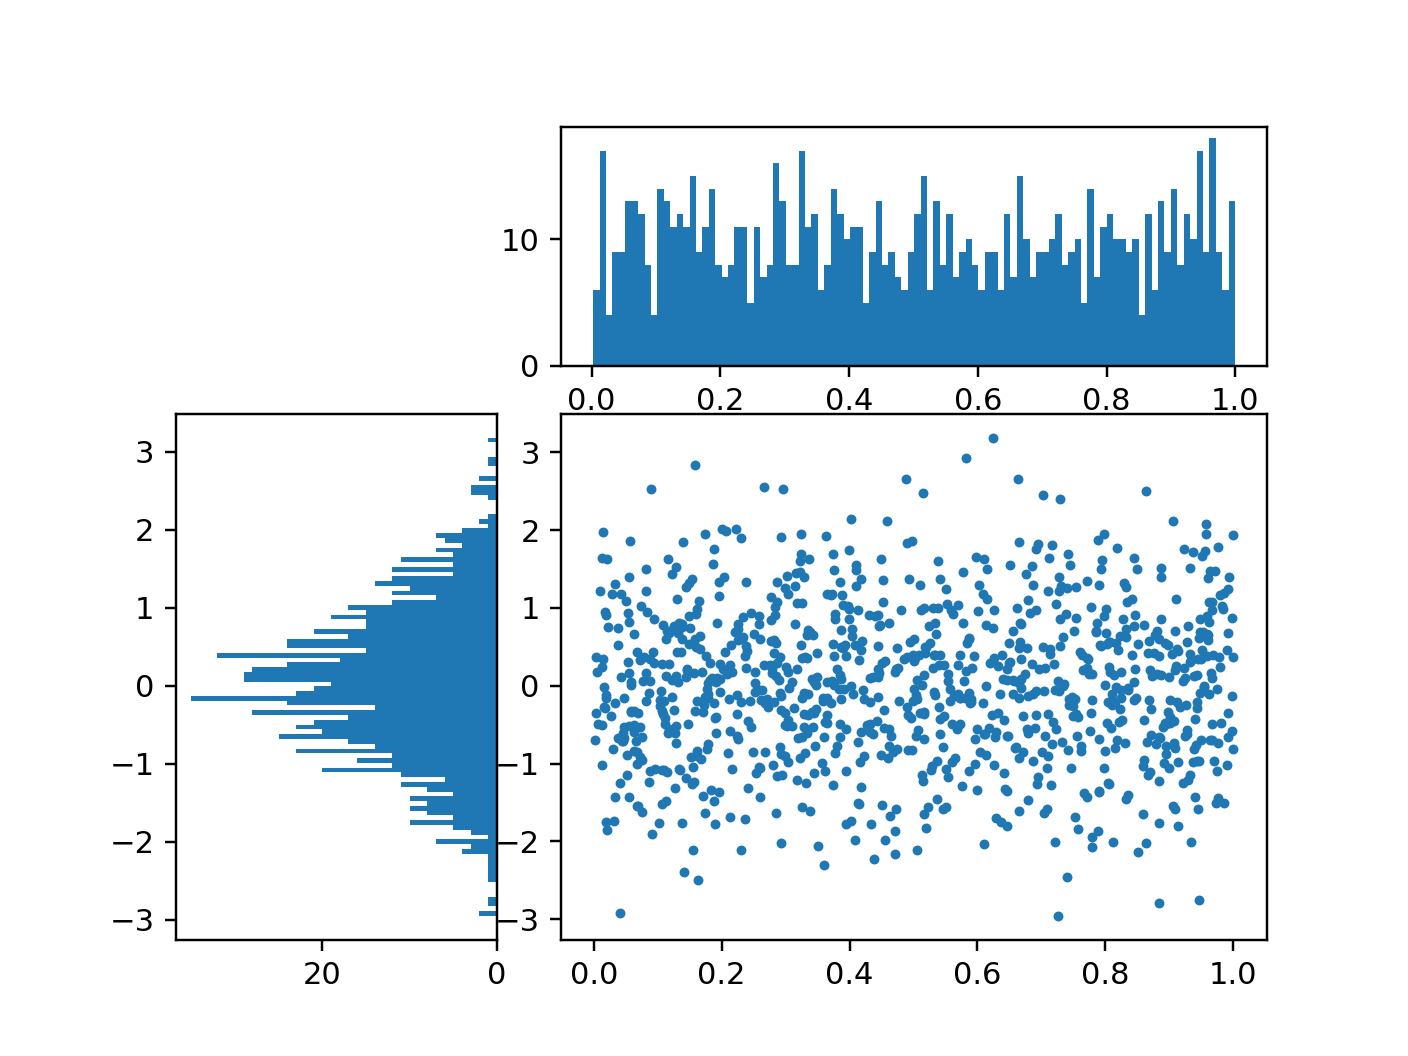

In [63]:
import matplotlib.gridspec as gridspec  
x = np.random.random(size=1000)
y = np.random.randn(1000)

plt.figure()  # new figure
gspec = gridspec.GridSpec(3, 3)

# get necessary axes
ax_top_histogram = plt.subplot(gspec[0, 1:])  # this returns axis
ax_side_histogram = plt.subplot(gspec[1:, 0])
ax_lower_right = plt.subplot(gspec[1:, 1:])

# make necessary drawwing 
ax_lower_right.scatter(x, y, s= 5)  # regular scatter
ax_top_histogram.hist(x, bins=100)  # Note:  normed=True, scales to 0-1 range. 
ax_side_histogram.hist(y, bins=100, orientation='horizontal')
ax_side_histogram.invert_xaxis()  # flip the histogram for more natural view 


***
<font color = green >

## Animation
</font>

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


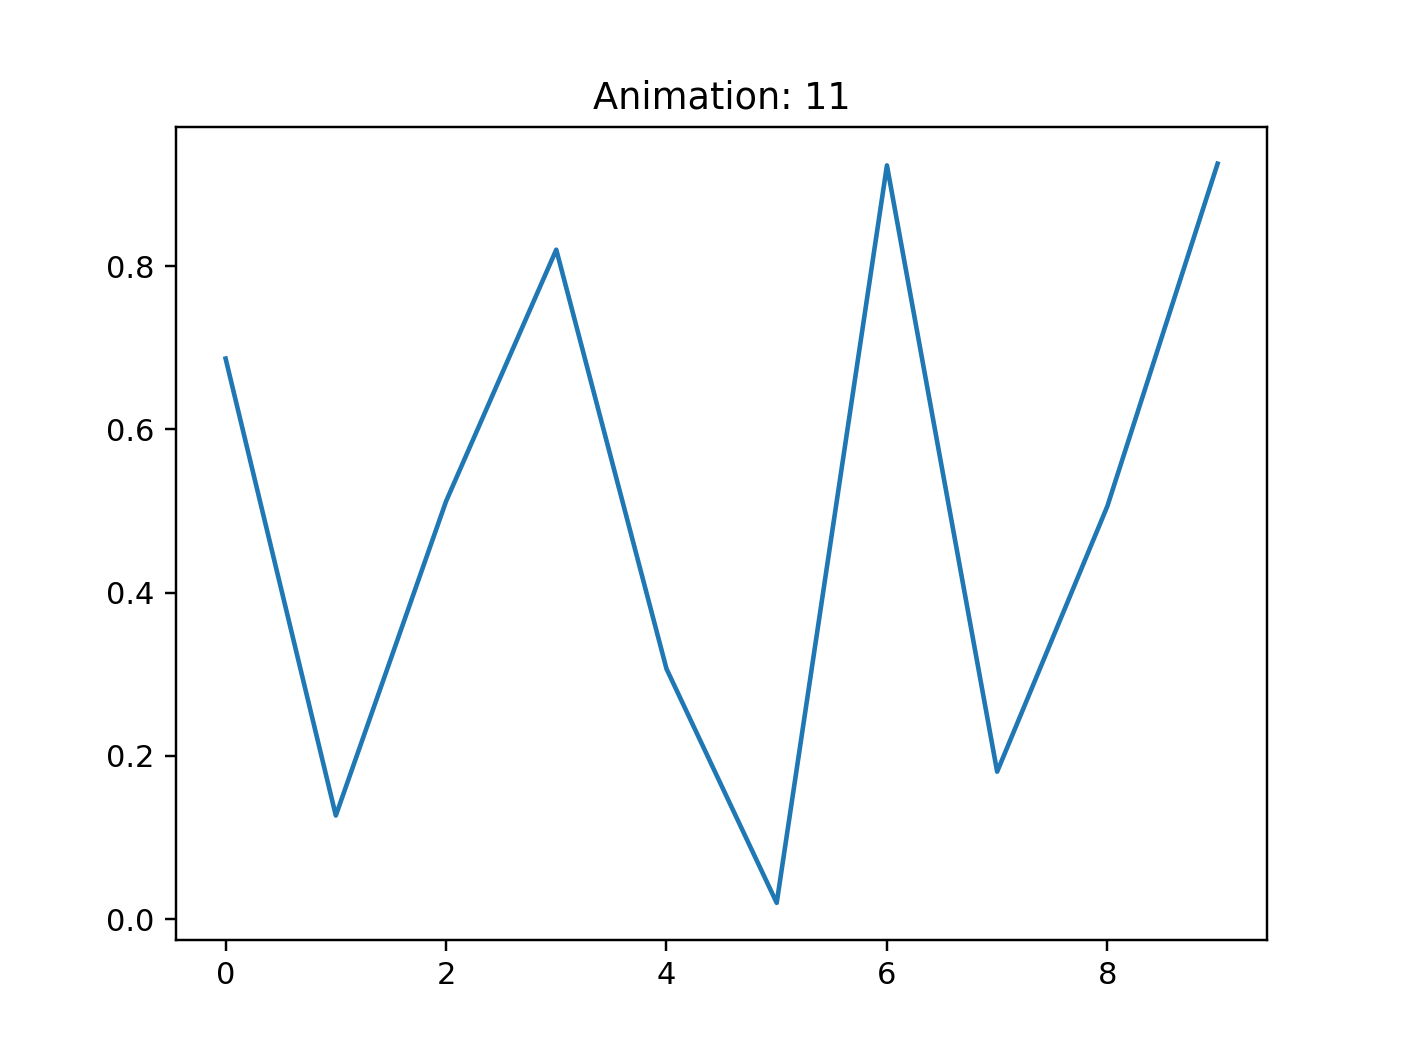

In [64]:
from matplotlib import animation
fig, ax = plt.subplots()

def update(curr):
    if curr>10:
        a.event_source.stop()
    ax.clear()
    ax.plot(np.random.rand(10))
    plt.title('Animation: {}'.format(curr)) # need to add it once more since it disappears with ax.clear()
#     ax.set_ylim(0, 1)
    

a = animation.FuncAnimation(fig, update, interval=500) # Note: you need to assign this in order to run the animation if you believe it necessary 
# Note use this name to stop animation

***
<font color = green >

## Interaction
</font>

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


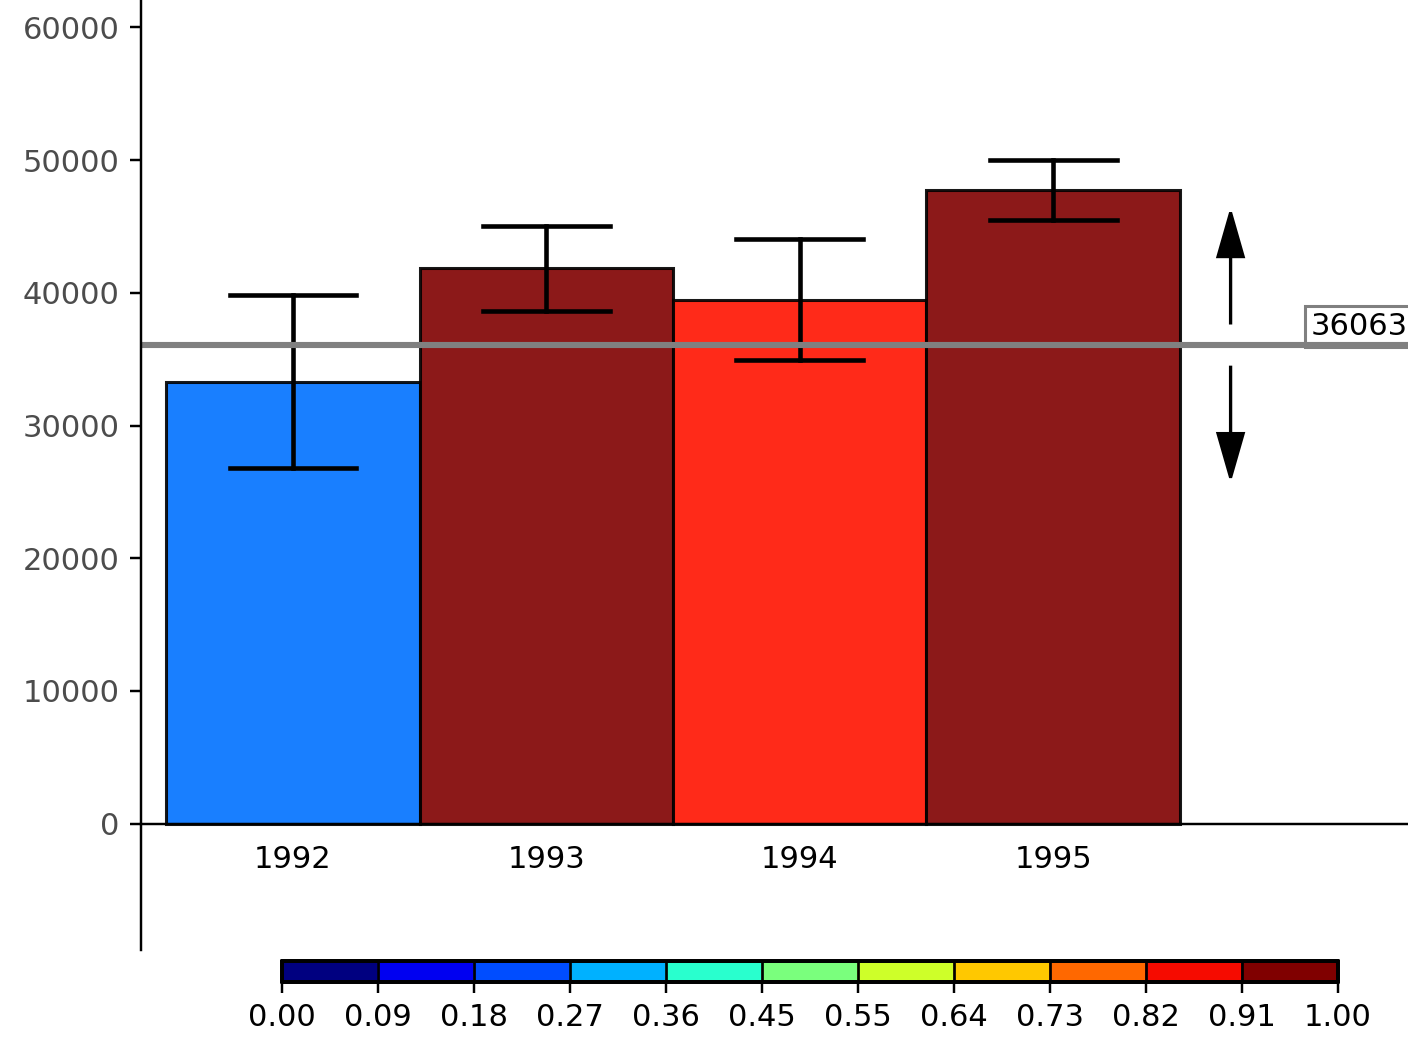

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib as mpl

def calc_conf_interval(data):
    return st.t.interval(0.95, len(data) - 1, loc=np.mean(data), scale=st.sem(data))

def onclick(event): # create event handler
    print (event.xdata)
    plt.gca().clear()
    update_plt(event.ydata)
    plt.gcf().canvas.draw() # Note: this is required to refresh the current window

def calc_prob(threshold, data_column):
    conf_inerval = calc_conf_interval(data_column)
    data_of_interval = data_column[(conf_inerval[0] <= data_column) & (data_column< conf_inerval[1])]
    data_larger= data_of_interval[threshold< data_of_interval]
    return len(data_larger)/len(data_of_interval ) # percentage of data from coef interval that larger than threshold


def update_plt(y_line=None):
    df_mean = df.mean()  # get mean of every column
    x_vals = np.arange(len(df.columns))

    if not y_line: # set initial = before any mouse click
        y_line= df_mean.mean()

    array_probs = np.array([calc_prob(y_line, df[year_index]) for year_index in df.columns])
    colors = np.array([cmap(array_probs[i]) for i in range(len(df.columns))])  # range 0-1
    bars = plt.bar(x_vals, df_mean, width=1, color = colors, alpha=0.9, edgecolor='black') # plt.errorbar does not work in Jupyter :(
    for i in range(len(df.columns)):
        conf_interval = calc_conf_interval(df[df.columns[i]])
        plt.plot([i, i], conf_interval, '-', color='black')  # draw the vertical line
        for boundary in conf_interval:
            plt.plot([i- 1/4, i + 1/ 4], [boundary, boundary], '-', color = 'black')


    plt.xticks(x_vals, df.columns, color='black', alpha=0.7)
    plt.tick_params(bottom=False)
    plt.yticks(color='black', alpha=0.7)

    max_bar = np.max(df_mean) # get max bar to use it as template for calculation of additional extension of plot area
    ax.axis([-0.6, 4.4, -max_bar*0.2,max_bar*1.3]) # correct plot position
    ax.spines['bottom'].set_position(('data', 0)) # move the x-axis to 0 point

    xmin, xmax = ax.get_xbound() # get x bounds for line
    plt.axhline(y=y_line, xmin=xmin - 2, xmax=xmax, linewidth=2, color='grey') # draw the line for all
    y_template = df_mean[df.columns[0]]/20
    ax.text(xmax, y_line +y_template/5,str(int(y_line)), ha= 'right', va= 'bottom',color= 'black',fontsize= 10,bbox=dict(facecolor='none', edgecolor='gray', pad=2.0))
    ax.arrow(3.70, y_line+ y_template, 0.0, y_template*3, fc="k", ec="k", head_width=0.1, head_length=y_template*2)
    ax.arrow(3.70, y_line - y_template, 0.0, -y_template*3, fc="k", ec="k",
             head_width=0.1, head_length=y_template*2)

    ax.spines['top'].set_visible(False)  # remove the border top
    ax.spines['right'].set_visible(False)  # remove the border right


    bounds = np.linspace(0, 1, 12) # set the bound for color bar
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm,drawedges=True,  ticks=bounds, boundaries=bounds,format='%.2f',orientation='horizontal')

np.random.seed(12345) # allows to get the same random sequesnce at every launch of program
df = pd.DataFrame([np.random.normal(32000,200000,3650),
                   np.random.normal(43000,100000,3650),
                   np.random.normal(43500,140000,3650),
                   np.random.normal(48000,70000,3650)],
                  index=[1992,1993,1994,1995])

df = df.T

fig = plt.figure()
ax_main= plt.gca()
ax_main.axis('off') # remove border and axis
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # create new axis to update x,y,length,hight

fig.canvas.mpl_connect('button_press_event', onclick) # subscribe the event hander to event
cmap = plt.cm.jet # set the color schema
# cmap = mpl.cm.viridis # alternative color chema # https://matplotlib.org/examples/color/colormaps_reference.html

ax_cb = fig.add_axes([0.2, 0.07, 0.75, 0.02]) # create new axis for color bar x,y,length,hight
plt.sca(ax) # set the current axis as active
update_plt() # draw the plot before any click


***
<font color = green >

## Setting colors and styles
</font>

In [66]:
cmap(0) # (0.993248, 0.906157, 0.143936, 1.0)


(0.0, 0.0, 0.5, 1.0)

<font color = green >

### color map
</font>

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


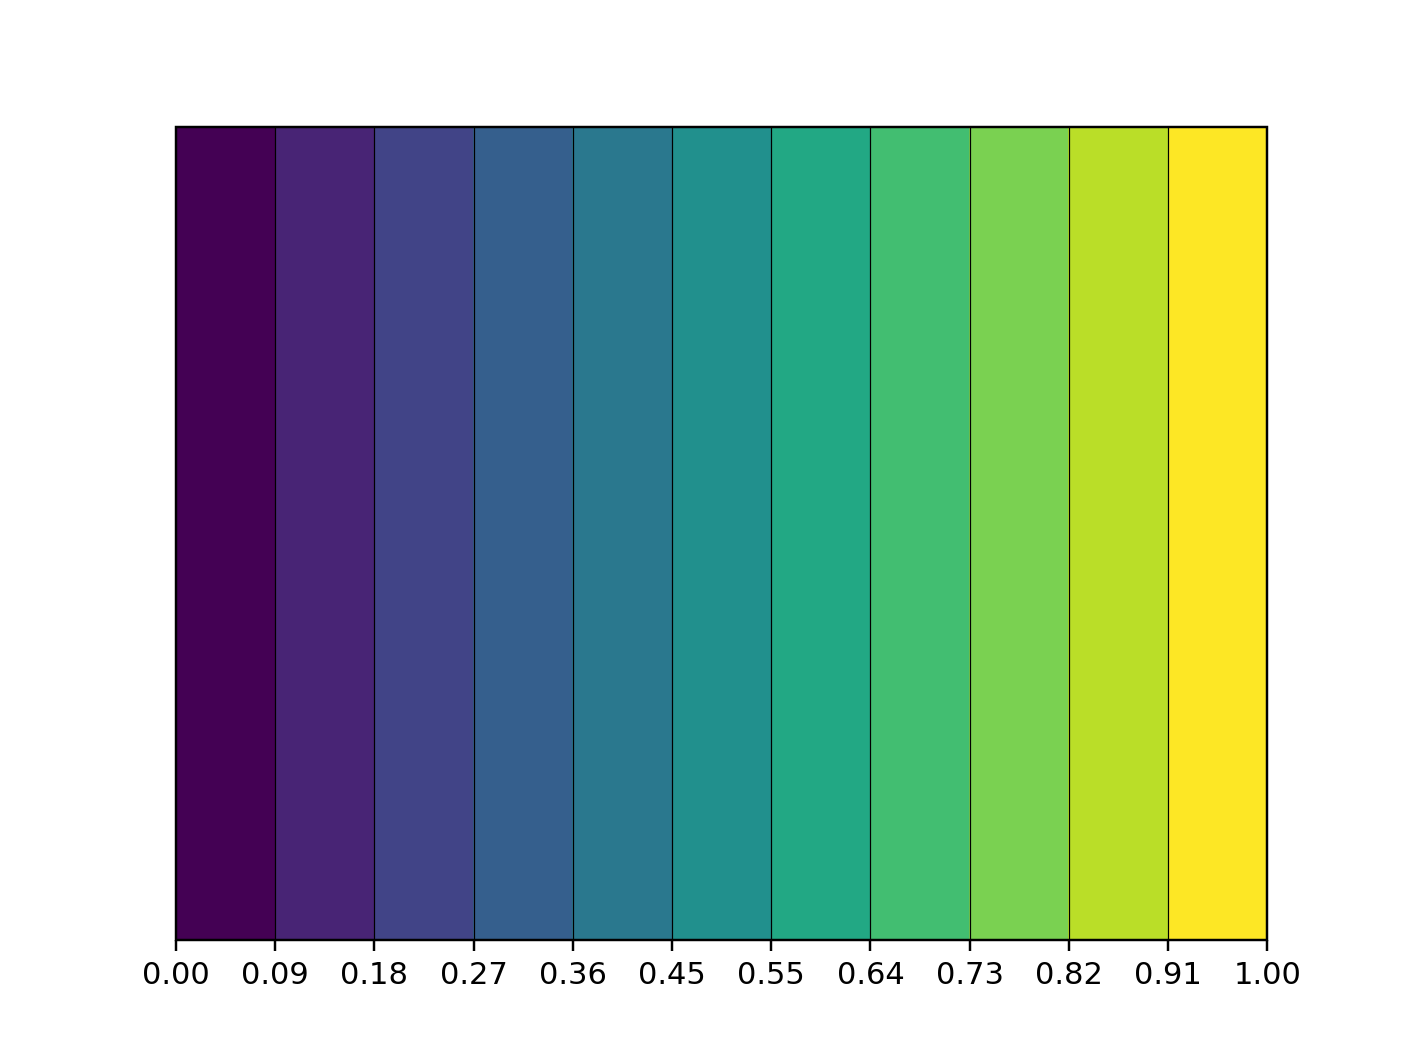

In [71]:
fig, ax = plt.subplots()
bounds = np.linspace(0, 1, 12) # set the bound for color bar
# cmap = mpl.cm.magma 
cmap = mpl.cm.viridis # alternative color chema # https://matplotlib.org/examples/color/colormaps_reference.html
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,drawedges=True,  ticks=bounds, boundaries=bounds,format='%.2f',orientation='horizontal')
# print ('color for 100 of {}: {}'.format(cmap.N, cmap(100)[:3]))

<font color = green >

### style
</font>

In [69]:
# Review the style : https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
plt.style.available # see the pre-defined styles provided

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

***
<font color = green >

## Visualization with pandas 
</font>

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
plt.style.use('seaborn-colorblind')
np.random.seed(123) 

#  Cumulative sum (running total) - total sum of data as it grows with time. 
# here it is random steps 
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20},
                  index=pd.date_range('1/1/2017', periods=365))
# print (df.head(20))
# print (df.describe())
df.head(20)

A          B          C
2017-01-01 -1.085631  20.059291 -20.230904
2017-01-02 -0.088285  21.803332 -16.659325
2017-01-03  0.194693  20.835588 -17.055481
2017-01-04 -1.311601  21.255156 -17.093802
2017-01-05 -1.890202  21.462083 -19.518638
2017-01-06 -0.238765  19.210548 -18.412372
2017-01-07 -2.665444  18.621577 -18.964625
2017-01-08 -3.094357  19.752729 -19.025419
2017-01-09 -1.828421  19.887807 -19.553459
2017-01-10 -2.695161  18.675538 -19.692142
2017-01-11 -3.374047  19.366315 -19.976389
2017-01-12 -3.468756  18.887192 -20.019431
2017-01-13 -1.977367  19.247243 -20.072233
2017-01-14 -2.616269  19.624163 -20.226438
2017-01-15 -3.060251  18.505468 -20.394315
2017-01-16 -3.494602  19.295296 -19.085797
2017-01-17 -1.288672  18.287787 -18.204380
2017-01-18  0.898114  16.982001 -17.316937
2017-01-19  1.902168  16.099172 -18.049386
2017-01-20  2.288355  15.753082 -16.792565

<font color = green >

### pandas plot
</font>

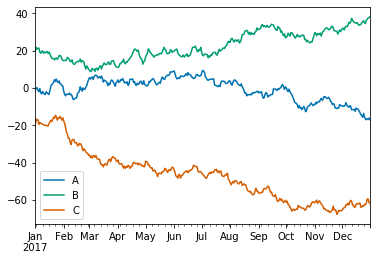

In [7]:
df.plot()


# Note: labels , legend

<font color = green >

### pandas scatter
</font>

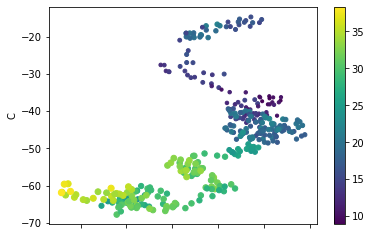

In [8]:
df.plot.scatter('A', 'C', c=df['B'], s=df['B'], colormap='viridis') 
# Note:: colorbar

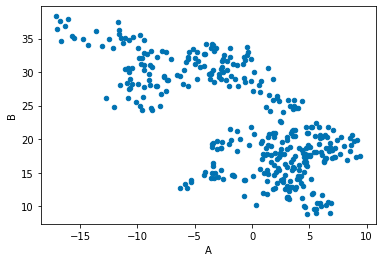

In [9]:
df.plot('A','B', kind = 'scatter')

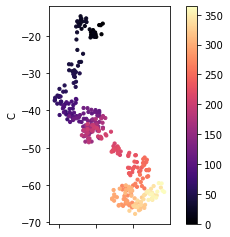

In [10]:
# alternative syntaxis df.plot.scatter instead of kind = 'scatter'
ax = df.plot.scatter('B', 'C', c=np.arange(len(df)), s=10, colormap='magma') # set color corresponding to index
# Note it return s axis object 
ax.set_aspect('equal') # to compare absolute ranges 

<font color = green >

### pandas histogram
</font>

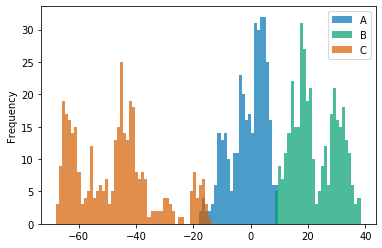

In [11]:
df.plot.hist(alpha=0.7, bins=100);

<font color = green >

### kernel density estimate
</font>

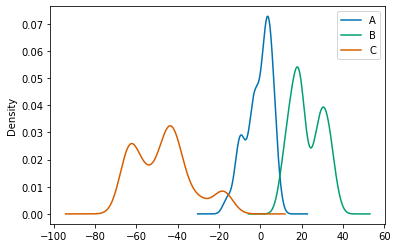

In [12]:
df.plot.kde() # kernel density estimate


In [13]:
# mention about seaborn 


<font color = green >

## Remove junk 
</font>

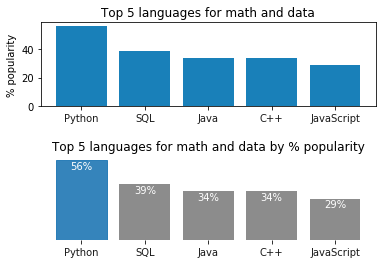

In [14]:
plt.figure()

# use subplot to demonstrate difference  
ax1 = plt.subplot(2,1, 1)
languages = ['Python','SQL', 'Java','C++', 'JavaScript']
popularity = np.array([56,39,34,34,29])
x_vals= range(len(popularity))
plt.bar (x_vals,popularity,align= 'center',alpha = 0.9)
plt.xticks(x_vals,languages,alpha = 0.9 )

plt.ylabel('% popularity')
plt.title('Top 5 languages for math and data')

ax_2 = plt.subplot(2,1,2)

languages = ['Python','SQL', 'Java','C++', 'JavaScript']
popularity = np.array([56,39,34,34,29])
x_vals= range(len(popularity))

bar_2= plt.bar (x_vals,popularity,align= 'center',alpha = 0.9, color= 'grey')
bar_2[0].set_color('#1F77B4')

plt.xticks(x_vals,languages,alpha = 0.9 )

# move the y-label to title 
plt.title('Top 5 languages for math and data by % popularity')

# hide axes ticks and y-axis labels 

plt.tick_params(
    top =False,
    bottom= True,
    left  = False,
    labelleft = False, 
    labelbottom = True 
    )


for bar in bar_2:
    ax_2.text(
        bar.get_x() + bar.get_width()/2, # set x position
        bar.get_height()-6, # set y position
        '{}%'.format(bar.get_height()), # # provide text
        ha= 'center',
        color= 'w',
        fontsize= 10
    )

for spine in ax_2.spines.values():
    spine.set_visible(False)


plt.subplots_adjust(hspace = .6)

<font color = green >

### Learn more
</font>

Вocumentation for Matplotlib
<br>https://matplotlib.org/index.html
<br>Applied Plotting, Charting & Data Representation in Python
<br>https://www.coursera.org/courses?query=plotting%20charting
<br>Ten Simple Rules for Better Figures
<br>https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833#s8
<br>Hunter, J., & Droettboom, M. (2012). matplotlib in A. Brown (Ed.), The Architecture of Open Source Applications, Volume II: Structure, Scale, and a Few More Fearless Hacks (Vol. 2)
<br>http://www.aosabook.org/en/matplotlib.html
<br>seaborn: statistical data visualization
<br>https://seaborn.pydata.org/index.html



